# Comparing different datasets, sample level

- Comparing surface marker expression between B cells and NK cells 

Datasets:

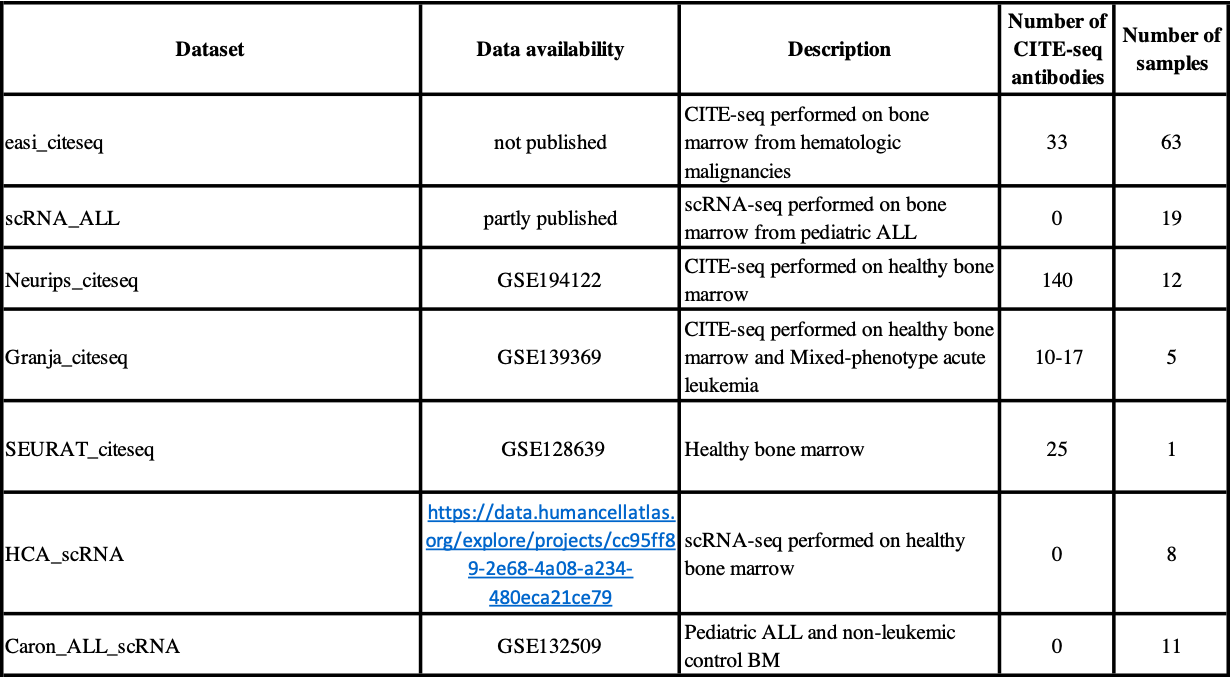

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


## File preparations

### Neurips

In [2]:
#Neurips

adata_neurips = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_neurips_norm.h5ad')

In [3]:
adata_neurips.obs['new_cell_type'].unique()

['NK', 'T', 'Prog', 'Myel', 'B', 'DC', 'E', 'Normoblast']
Categories (8, object): ['B', 'DC', 'E', 'Myel', 'NK', 'Normoblast', 'Prog', 'T']

In [4]:
#Select only NK cells

neurips_nk=adata_neurips[adata_neurips.obs['new_cell_type'] == 'NK' ]

In [5]:
neurips_nk

View of AnnData object with n_obs × n_vars = 7388 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    obsp: 'connectivities', 'distances'

In [6]:
neurips_nk_prot=neurips_nk.obsm['protein_expression_clr_neurips']

In [7]:
neurips_nk_prot

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD101,CD88,CD224,CD197,CD34,CD10,CD90,CD15,CD117,CD66ace
GTAGTACCAATCCTTT-1-s4d1,0.652674,1.447594,1.489354,0.890243,1.290341,1.988618,1.733474,0.850004,1.531390,0.694828,...,0.900688,1.389844,0.918109,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTGTGGGTCATGCGGC-1-s4d1,0.378666,1.132949,1.153412,0.730824,1.195368,1.546005,1.090567,1.173337,1.303511,1.013739,...,0.860303,0.979461,1.147198,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCAACATTCGCAAGAG-1-s4d1,0.378666,1.192753,1.208881,0.000000,1.456877,1.046035,1.333993,0.638218,1.360894,1.072649,...,0.329073,1.280509,0.676616,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCACGGGTCGCACGAC-1-s4d1,0.000000,0.849902,1.548700,0.730824,1.530781,1.883102,1.686271,1.240123,1.804089,0.812797,...,0.576253,1.189870,1.000442,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGCCAGAAGACCATTC-1-s4d1,0.652674,1.249182,1.404314,0.306698,1.417770,1.664855,1.409627,1.302726,1.663363,0.849218,...,0.680162,1.415407,0.729806,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCATTCGTCCAATCA-1-s1d3,0.000000,0.568367,1.124479,1.027708,0.600556,2.007513,1.679342,0.749707,0.545181,0.288523,...,0.519947,0.809714,0.357584,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACATTTCCAGCAGTGA-1-s1d3,0.000000,0.671273,0.856802,0.000000,0.284617,1.105431,0.818721,0.201533,0.309292,0.652195,...,0.519947,0.546717,0.194691,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGAGACTTCCTTCAGC-1-s1d3,0.000000,0.671273,0.734526,0.306698,0.284617,1.255114,1.174628,0.749707,0.625887,0.406586,...,0.396827,0.418509,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GAGATGGTCCGCCTAT-1-s1d3,0.000000,0.928521,0.999570,0.541080,0.600556,1.759143,2.420602,1.024682,0.700563,0.406586,...,0.576253,0.546717,0.430053,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#To exclude columns that contain only zeros

neurips_nk_prot = pd.DataFrame(neurips_nk_prot)
neurips_nk_prot != 0
(neurips_nk_prot != 0).any(axis=0)
neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]
neurips_nk_prot = neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]


### Granja

In [9]:
adata_granja = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_granja_norm.h5ad')

In [10]:
adata_granja.obs['cell_type'].unique().to_list()

['CD4+ T 1',
 'CD14+ monocyte 1',
 'Pre B',
 'Pro B',
 'CD8+ T',
 'Promonocyte',
 'CD14+ monocyte 2',
 'Plasmacytoid dendritic cell',
 'NK T 2',
 'Immature B',
 'Late erythoid precursor 1',
 'Pre B (cycling)',
 'NK',
 'Late erythoid precursor 3',
 'Early erythoid precursor',
 'CD16+ monocyte',
 'Conventional dendritic cell',
 'HSC',
 'NK T 1',
 'Late erythoid precursor 2',
 'Plasma B cell',
 'Stromal cell',
 'Megakaryocyte',
 nan]

In [11]:
#Select NK cells
granja_nk=adata_granja[adata_granja.obs['new_cell_type'] == 'NK' ]

In [12]:
granja_nk

View of AnnData object with n_obs × n_vars = 1033 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_granja'
    obsp: 'connectivities', 'distances'

In [13]:
granja_nk_prot=granja_nk.obsm['protein_expression_clr_granja']

granja_nk_prot

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD101,CD88,CD224,CD197,CD34,CD10,CD90,CD15,CD117,CD66ace
BMMC_D1T1:AAAGAACTCGAAGAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.346739,0.0,0.0
BMMC_D1T1:AAAGGGCAGAAGTGTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.927923,0.0,0.0
BMMC_D1T1:AAAGTCCGTCGGAAAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.890060,0.0,0.0
BMMC_D1T1:AAAGTGAGTTACCCAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.346739,0.0,0.0
BMMC_D1T1:AACAAAGAGTCTGCGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.016744,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BMMC_D1T2:TTTACTGGTCAGGAGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.830436,0.0,0.0
BMMC_D1T2:TTTCACACAACGCATT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.144246,0.0,0.0
BMMC_D1T2:TTTCAGTTCCAACACA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.744967,0.0,0.0
BMMC_D1T2:TTTCAGTTCTCGGCTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.809744,0.0,0.0


In [14]:
#To exclude columns that contain only zeros

granja_nk_prot = pd.DataFrame(granja_nk_prot)
granja_nk_prot != 0
(granja_nk_prot != 0).any(axis=0)
granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]
granja_nk_prot = granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]


### Easigenomics

### Comments:

- Only NKT annotation available (NK- + T-cells)

In [15]:
adata_easi = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')

In [16]:
adata_easi.obs['cell_type'].unique().to_list()

['NKT',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [17]:
#Select NK + T

easi_nkt=adata_easi[adata_easi.obs['cell_type'] == 'NKT' ]

In [18]:
easi_nkt

View of AnnData object with n_obs × n_vars = 27738 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [21]:
easi_nkt_prot=easi_nkt.obsm['protein_expression_clr']


In [22]:
#To exclude columns that contain only zeros

easi_nkt_prot = pd.DataFrame(easi_nkt_prot)
easi_nkt_prot != 0
(easi_nkt_prot != 0).any(axis=0)
easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]
easi_nkt_prot = easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]


### Seurat 

In [25]:
#Seurat

adata_seurat = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_seurat_norm.h5ad')

In [26]:
adata_seurat.obs['cell_type'].unique().to_list()

['Prog_RBC',
 'gdT',
 'CD4 Naive',
 'CD4 Memory',
 'CD14 Mono',
 'Naive B',
 'CD8 Naive',
 'Treg',
 'CD8 Effector_2',
 'NK',
 'GMP',
 'CD8 Effector_1',
 'CD16 Mono',
 'pDC',
 'CD8 Memory_1',
 'MAIT',
 'Memory B',
 'cDC2',
 'CD56 bright NK',
 'Prog_B 2',
 'Prog_Mk',
 'CD8 Memory_2',
 'Plasmablast',
 'HSC',
 'LMPP',
 'Prog_DC',
 'Prog_B 1']

In [27]:
#Select NK-cells

seurat_nk=adata_seurat[adata_seurat.obs['new_cell_type'] == 'NK' ]

In [28]:
seurat_nk_prot=seurat_nk.obsm['protein_expression_clr_seurat']


In [29]:
#To exclude columns that contain only zeros

seurat_nk_prot = pd.DataFrame(seurat_nk_prot)
seurat_nk_prot != 0
(seurat_nk_prot != 0).any(axis=0)
seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]
seurat_nk_prot = seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]


## Comparisons

In [30]:
#NK cell markers (Reference 1)

nk_immature = ['CD56']
nk_activating= ['CD335', 'CD314', 'CD2', 'CD226']
nk_maturation= ['CD57']
# nk_inhibitory= ['CD158A', 'CD158B2', 'CD158E1'] these markers not found in Neurips data

nk_mustjoki = [nk_immature, nk_activating, nk_maturation]
nk_mustjoki = list(np.concatenate(nk_mustjoki).flat)



In [41]:
#NK cell markers (Reference 2) used in Neurips antibody panel

nk_immature_pfef = ['CD56']
nk56dim = ['CD94','CD158b', 'CD57']

# nk_adaptive =['CD158b', 'CD159c, CD57'] CD159c not used in Neurips, so this is same as previous

nk_transition= ['TIGIT', 'CD155', 'CD226', 'CD161'] 

c1_pfef = ['CD195', 'CD122', 'CD94']
c2_pfef = ['CD62L', 'CD127', 'CD27', 'TIGIT']
c3_pfef = ['CD16', 'CD38']

pseudotime= ['CD161', 'CD94', 'CD56', 'CD5', 'CD7', 'CD122']


#bigger list including all markers

nk_pfef=[nk56dim, nk_transition, c1_pfef, c2_pfef, c3_pfef, pseudotime]
nk_pfef = list(np.concatenate(nk_pfef).flat)

In [42]:
#markers from both references

nk_all = [nk_mustjoki, nk_pfef]
nk_all = list(np.concatenate(nk_all).flat)

In [43]:
#creating one list, each marker only once in the list
nk_both = []

for marker in nk_mustjoki:
    if marker not in nk_pfef:
        nk_both.append(marker)
 

In [44]:
nk_both


['CD335', 'CD314', 'CD2']

In [45]:
nk_all = [nk_both, nk_pfef]

In [46]:
nk_pfef

['CD94',
 'CD158b',
 'CD57',
 'TIGIT',
 'CD155',
 'CD226',
 'CD161',
 'CD195',
 'CD122',
 'CD94',
 'CD62L',
 'CD127',
 'CD27',
 'TIGIT',
 'CD16',
 'CD38',
 'CD161',
 'CD94',
 'CD56',
 'CD5',
 'CD7',
 'CD122']

In [47]:
nk_all = list(np.concatenate(nk_all).flat)

In [50]:
#check which markers were used in Neurips

listOfmarkers= nk_all

nk_all= []

for x in listOfmarkers:
    if x in neurips_nk_prot.columns:
        nk_all.append(x)


### Neurips

In [748]:
samples=adata_neurips.obs['POOL'].unique().tolist()

In [749]:
#saving NK markers from all samples into a list

list_samples=[]

for sample in samples:
    eg=adata_neurips[adata_neurips.obs['new_cell_type'] == 'NK']
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_clr_neurips']
    prot_marker=prot[nk_all]
    list_samples.append(prot_marker)
    

In [750]:
string= " NK cells"

samples_nk = [x + string for x in samples]

In [751]:
list_neurips=[]

for i in range(len(list_samples)):
    sample= list_samples[i]
    sample["Sample"]=samples_nk[i]
    list_neurips.append(sample)
    

df_all=pd.concat(list_neurips, axis=0)

In [752]:
df_all.shape

(7388, 26)

In [753]:
df_all.columns

Index(['CD335', 'CD314', 'CD2', 'CD94', 'CD158b', 'CD57', 'TIGIT', 'CD155',
       'CD226', 'CD161', 'CD195', 'CD122', 'CD94', 'CD62L', 'CD127', 'CD27',
       'TIGIT', 'CD16', 'CD38', 'CD161', 'CD94', 'CD56', 'CD5', 'CD7', 'CD122',
       'Sample'],
      dtype='object')

In [754]:
df_all = df_all.T.drop_duplicates().T

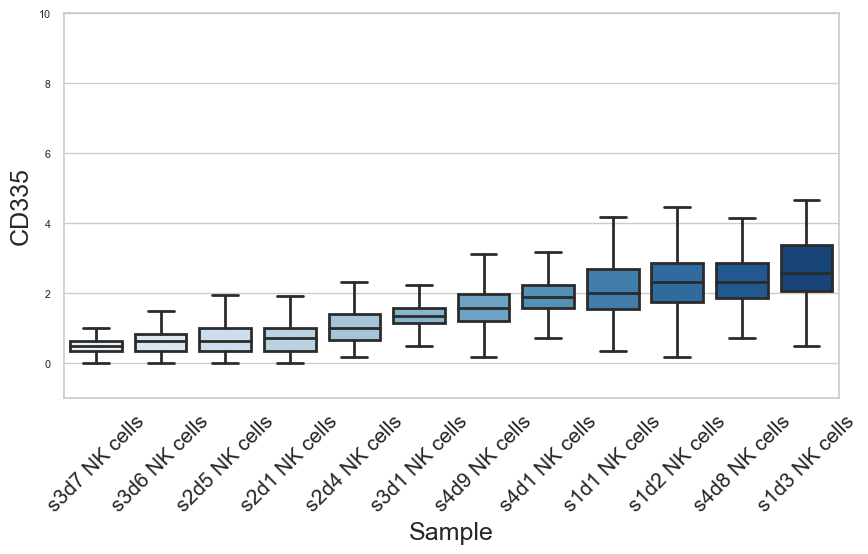

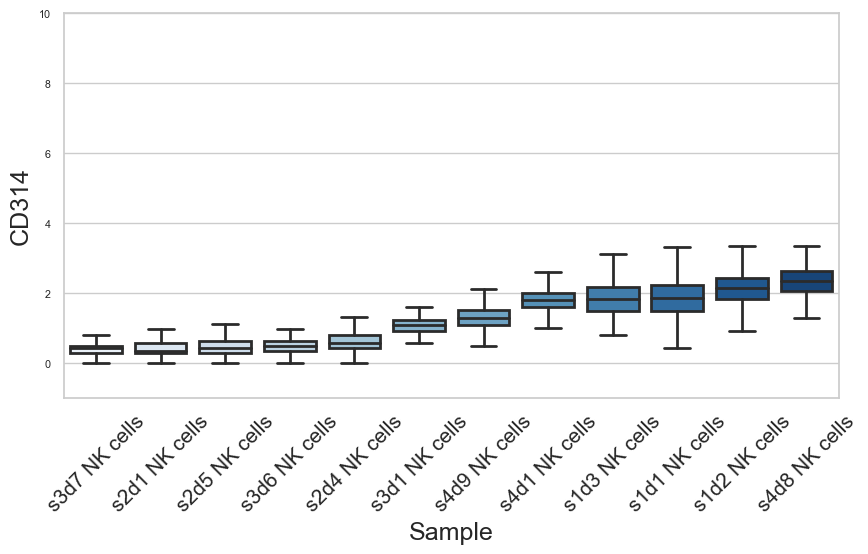

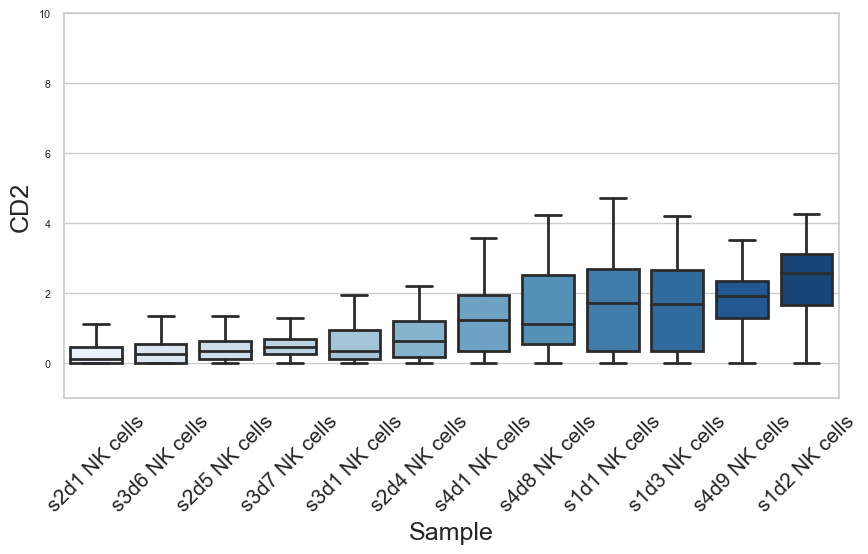

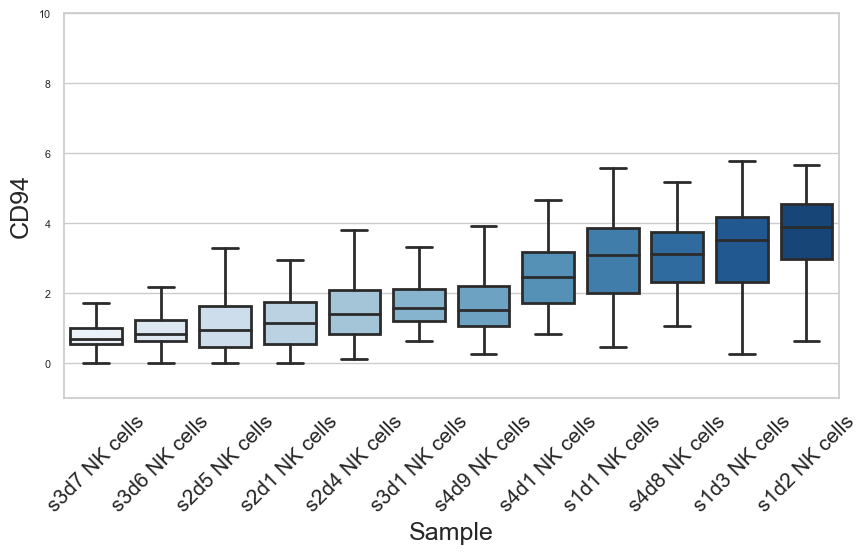

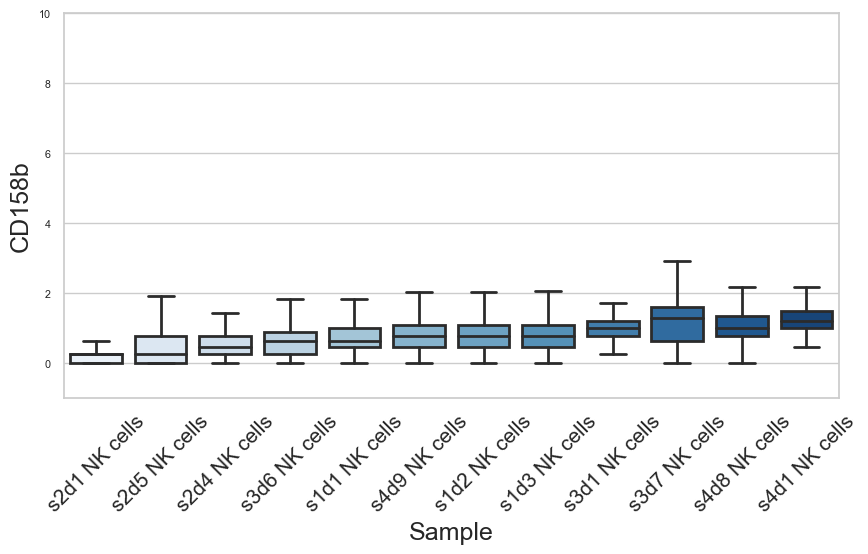

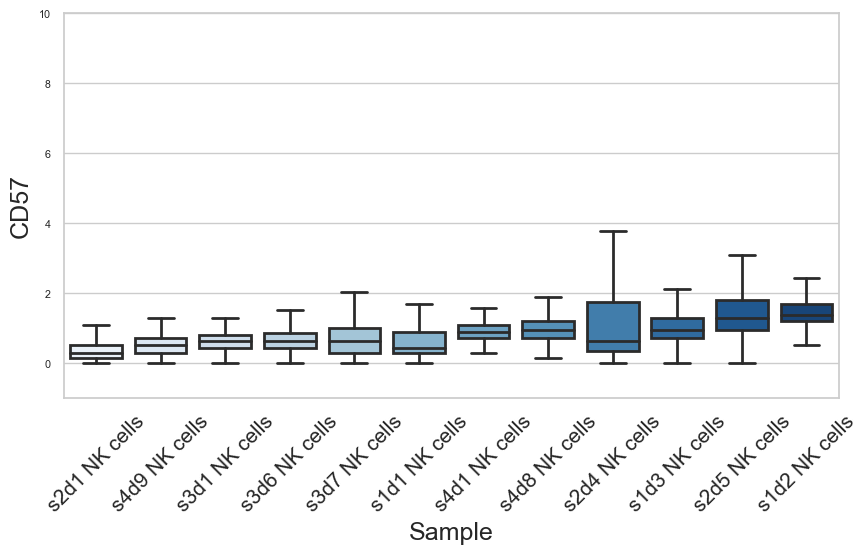

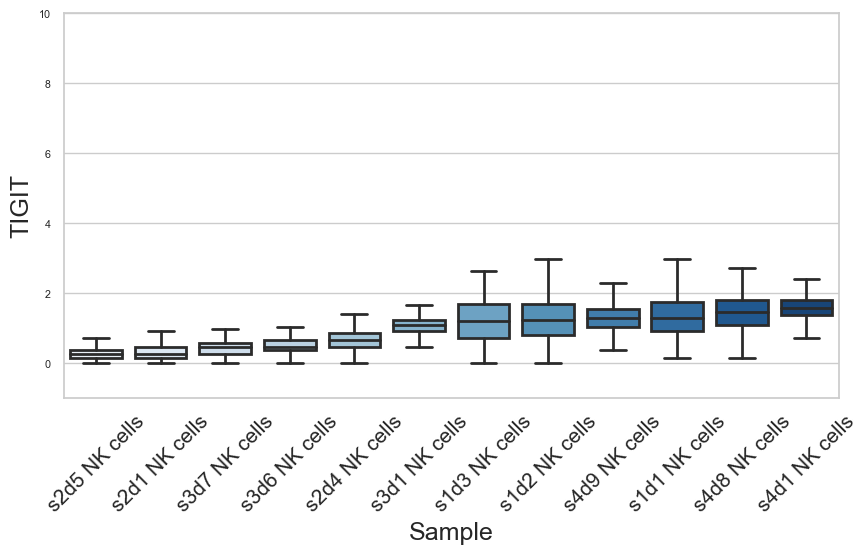

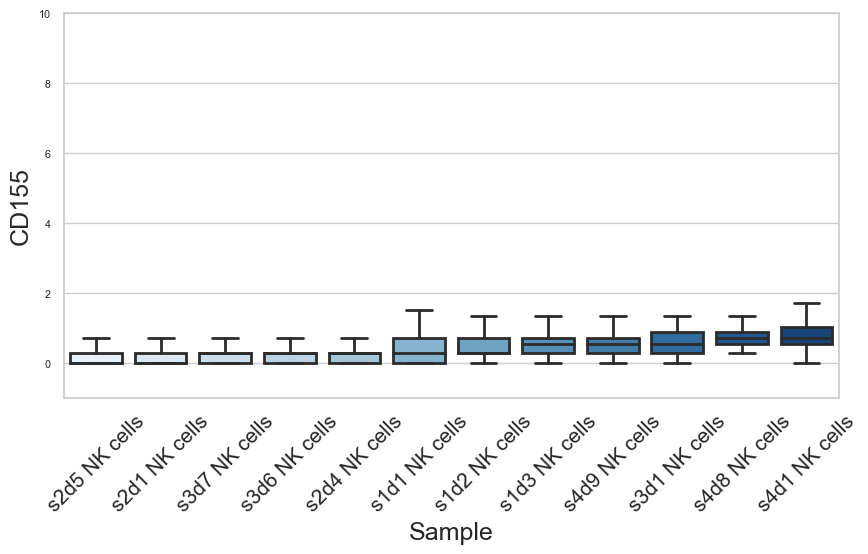

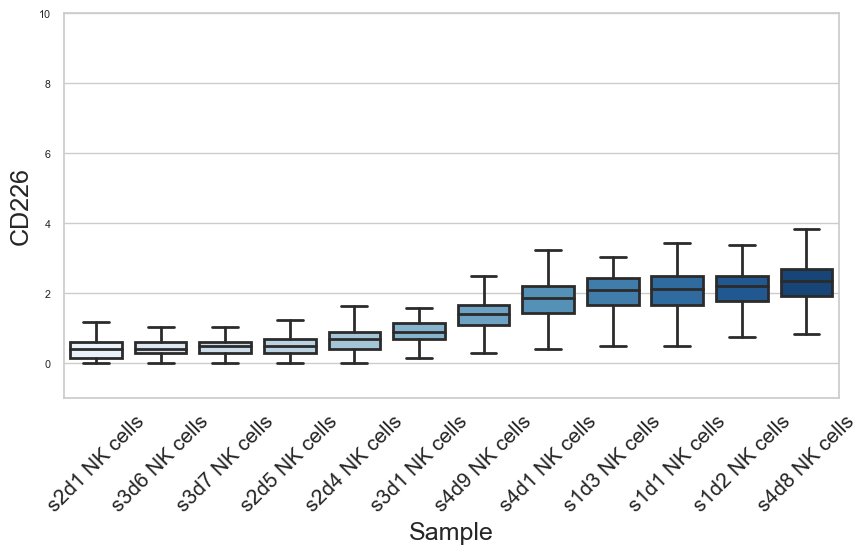

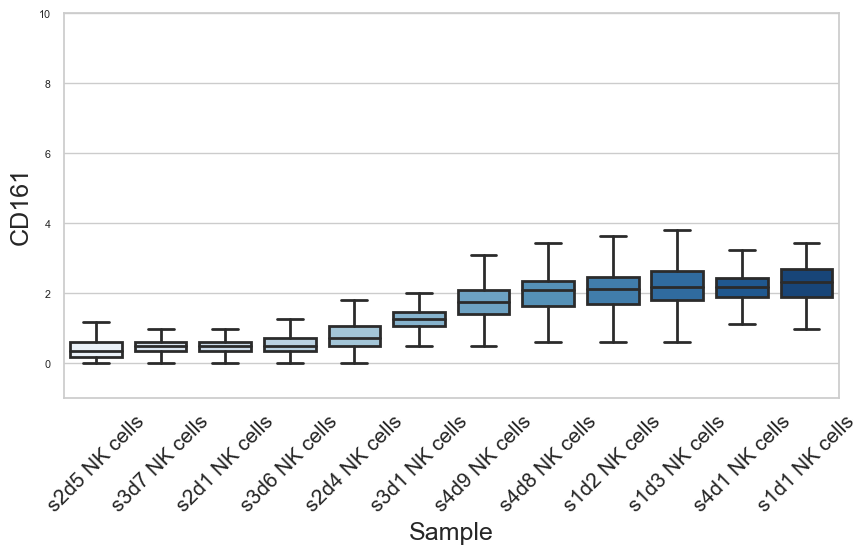

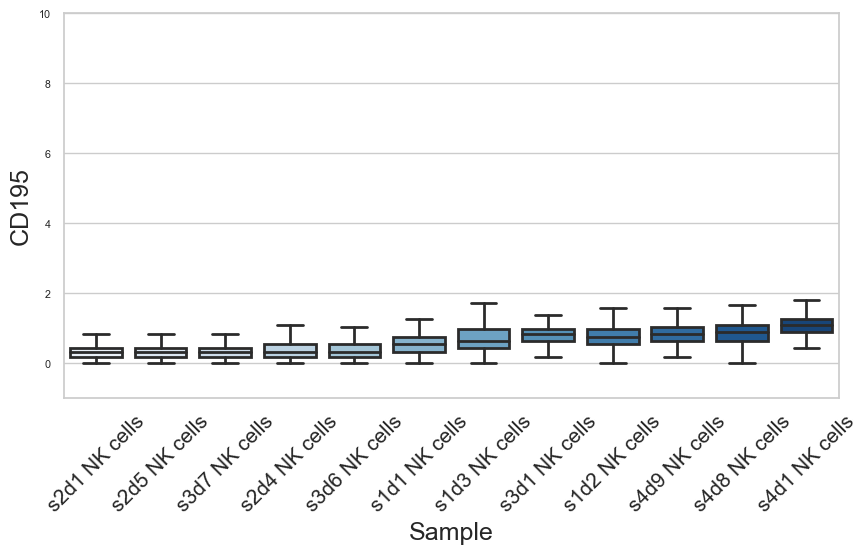

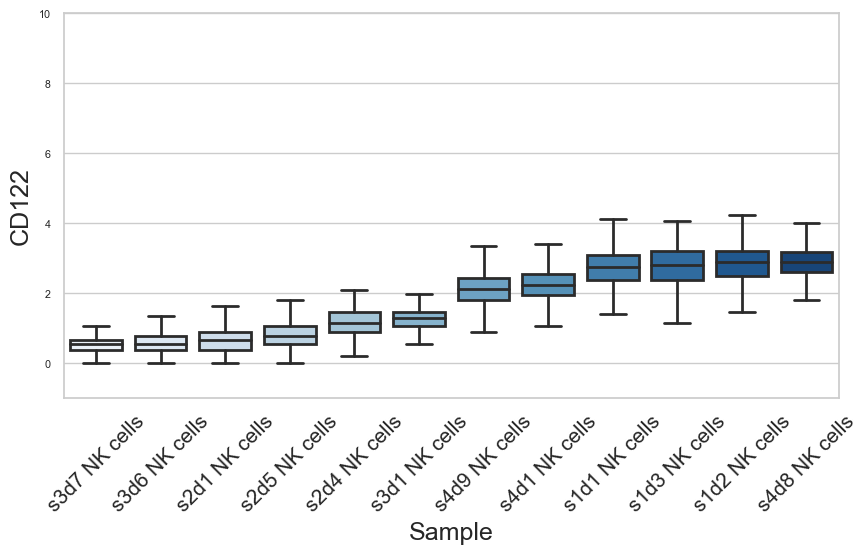

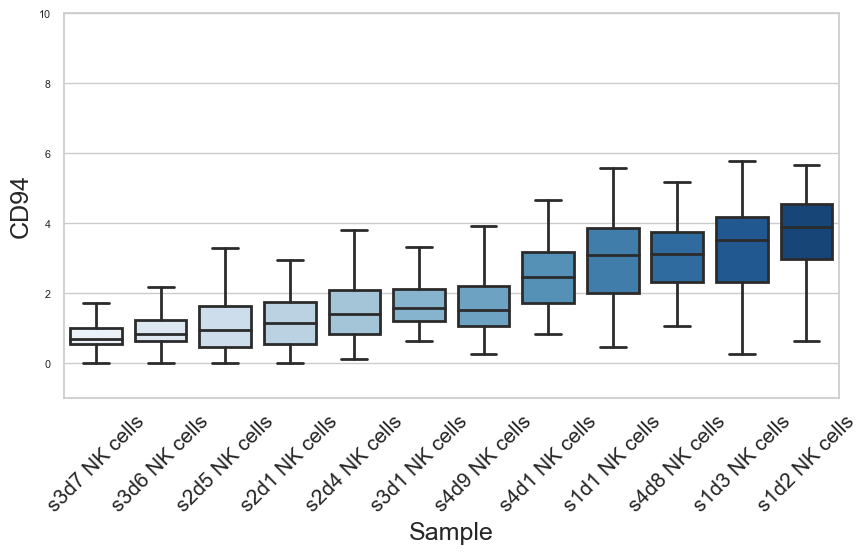

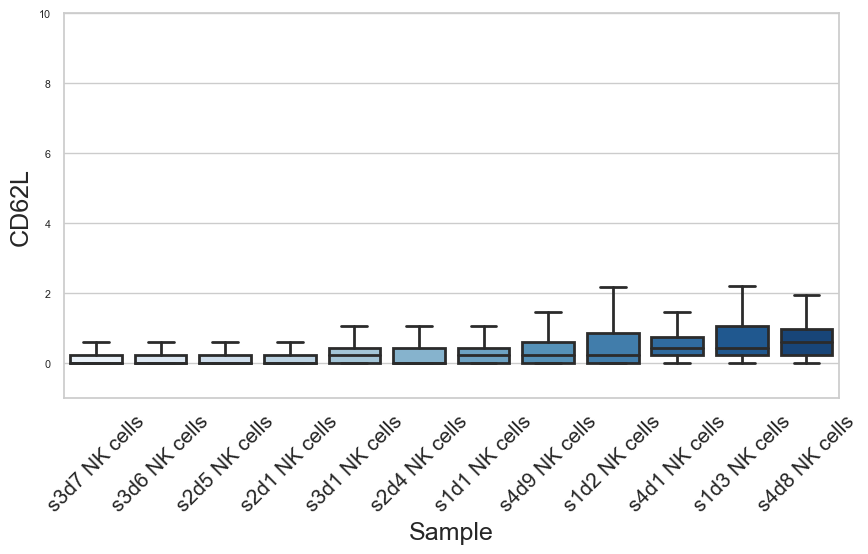

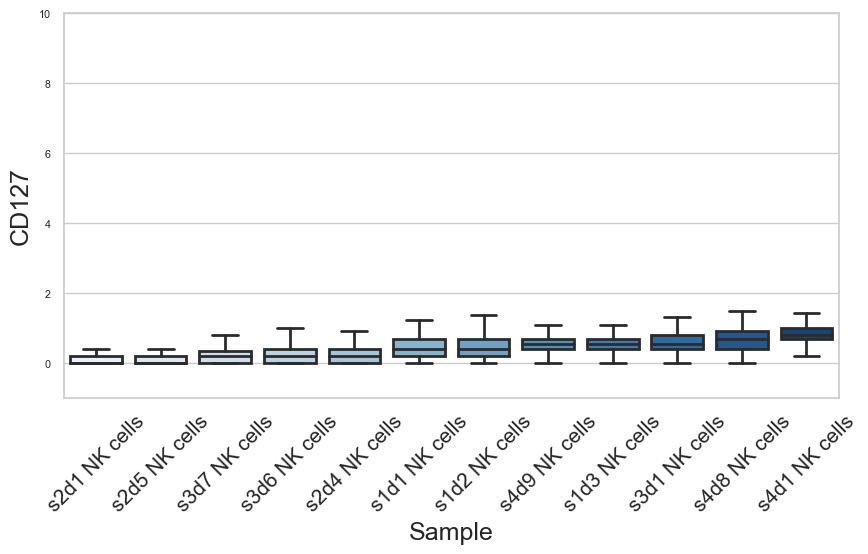

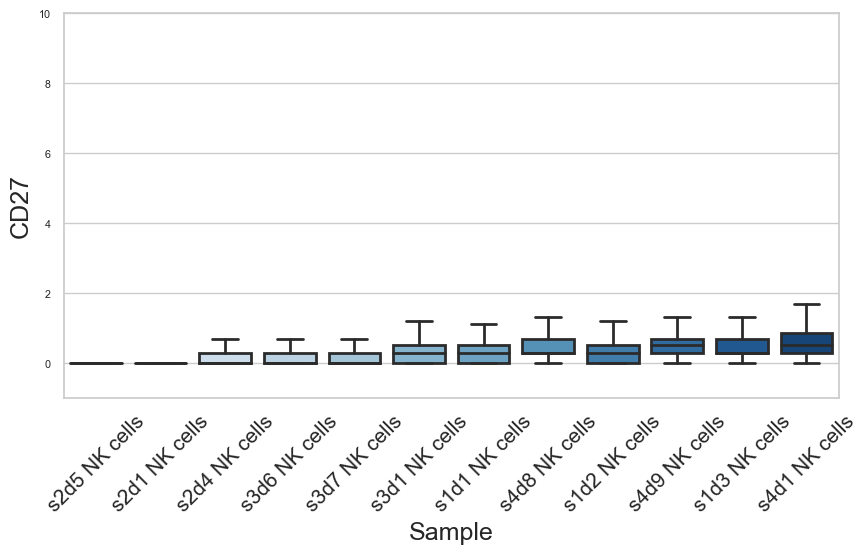

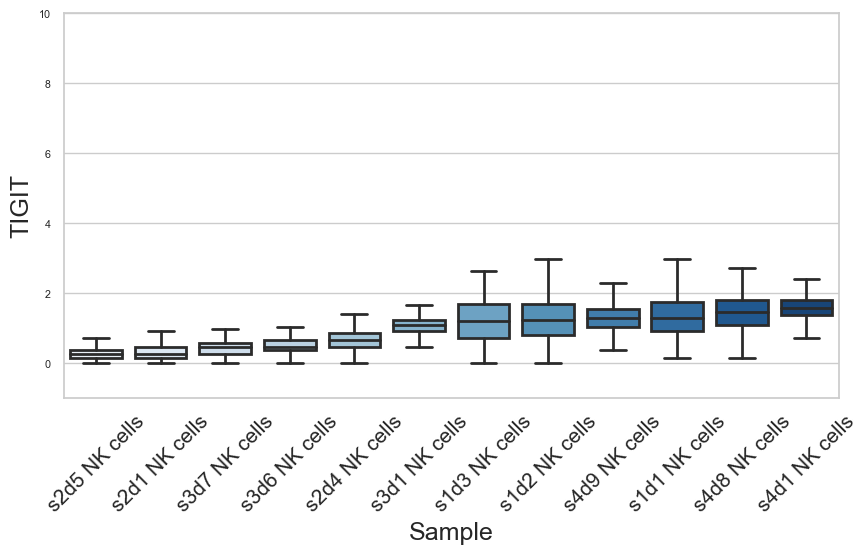

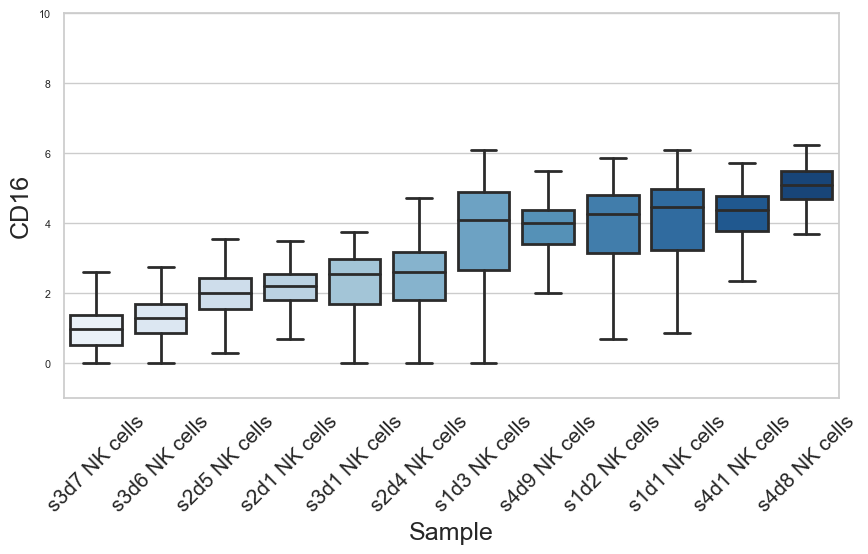

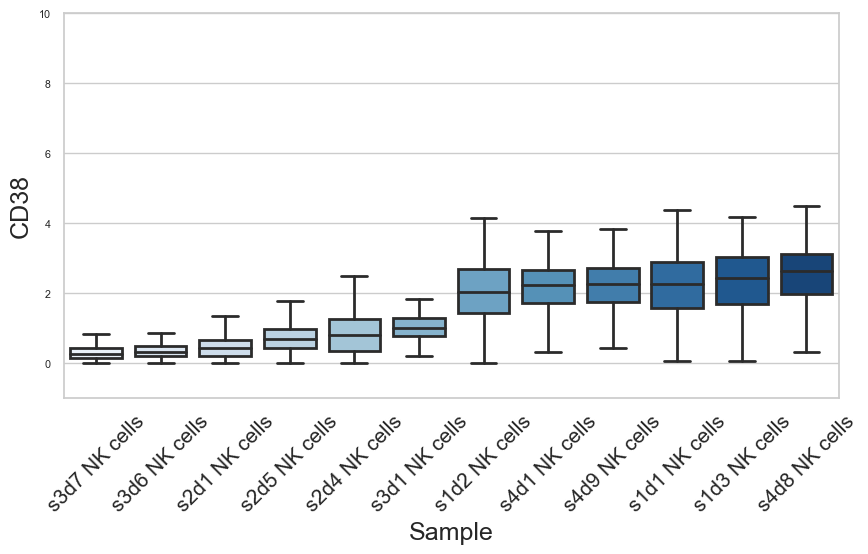

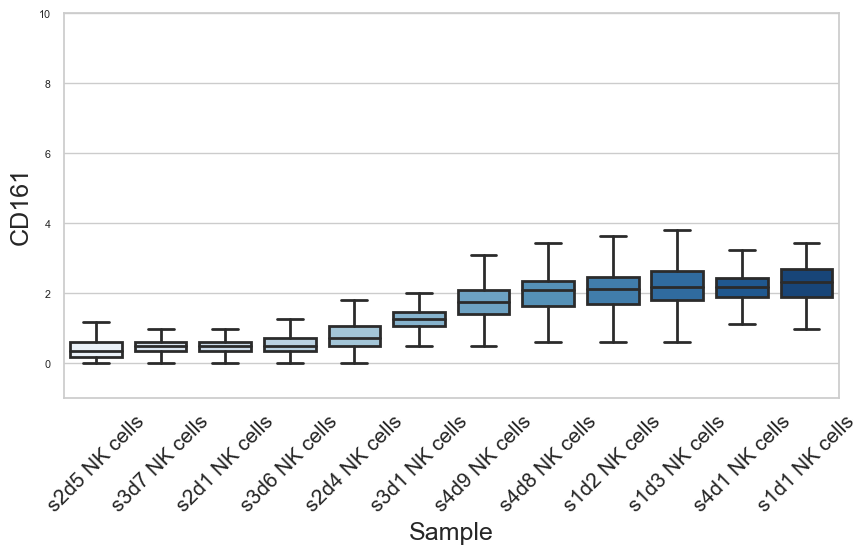

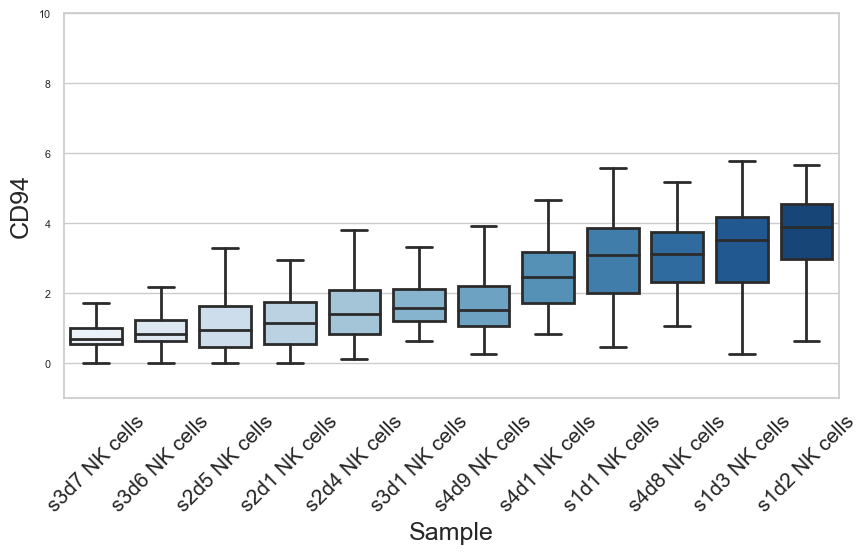

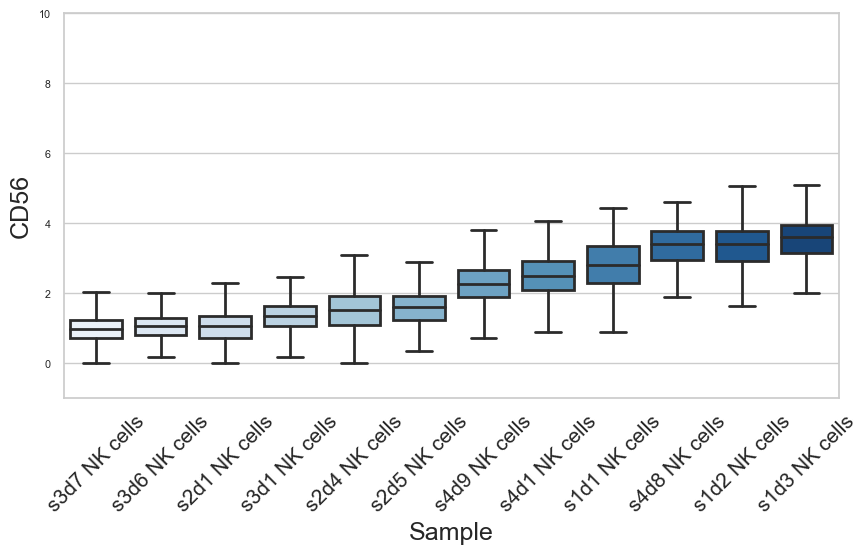

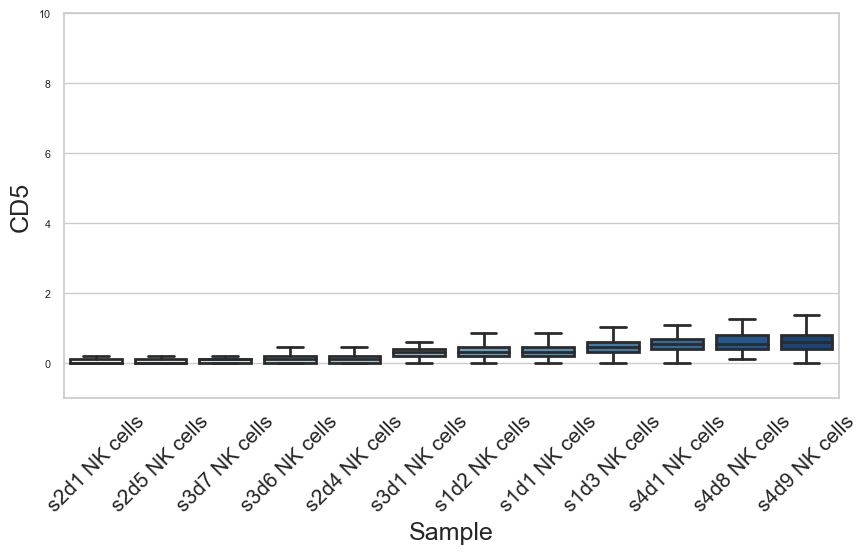

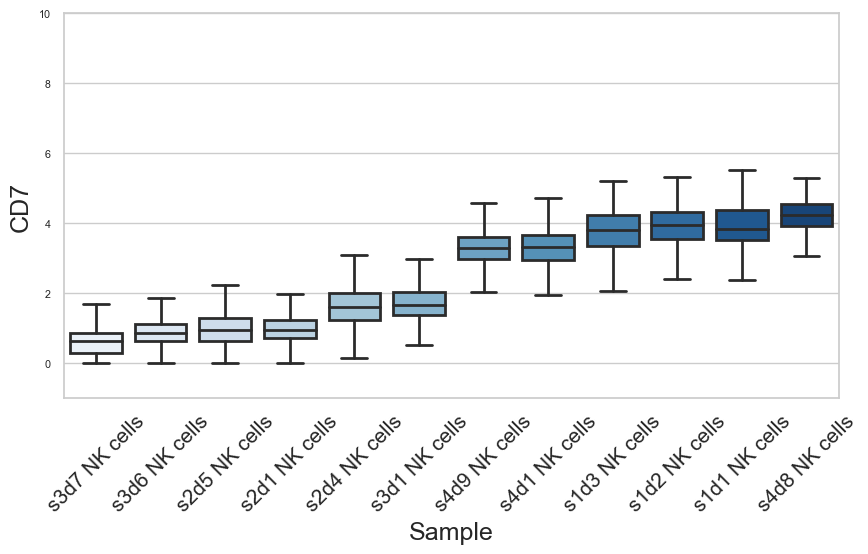

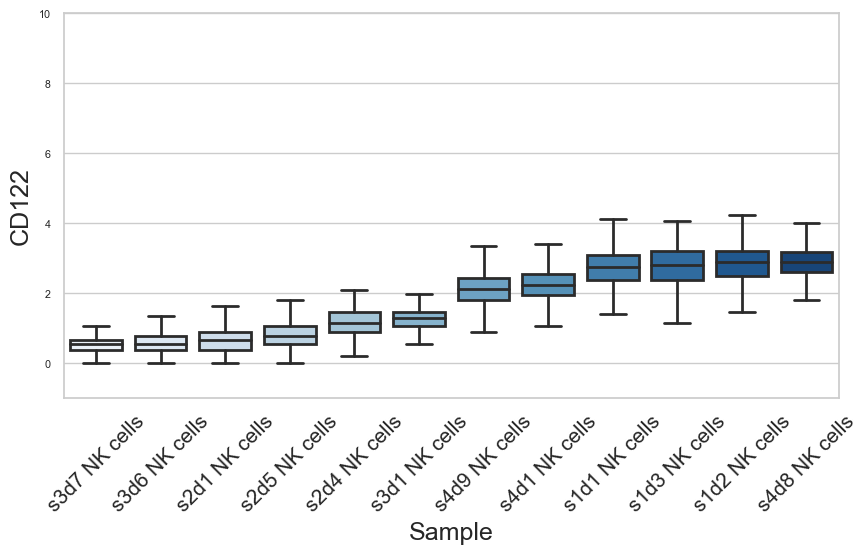

In [755]:
#protein counts, NK cells

for marker in nk_all:
    plt.figure(figsize=[10,5])
    plt.ylim(-1, 10)
    by_counts = df_all.groupby(['Sample'])[marker].mean().sort_values(ascending=True)
    b=sns.boxplot(data=df_all,x="Sample", y=marker, order=by_counts.index, fliersize=0, palette="Blues", linewidth=2)
    b.set_xticklabels(b.get_xticklabels(),rotation=45) 
    b.tick_params(axis='x', labelsize=15)
    plt.xlabel('Sample', fontsize=18)
    plt.ylabel(marker, fontsize=18);

In [756]:
#selecting B cells
neurips_b=adata_neurips[adata_neurips.obs['cell_type'] == 'Naive CD20+ B IGKC+']

In [757]:
neurips_b

View of AnnData object with n_obs × n_vars = 3835 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    obsp: 'connectivities', 'distances'

In [758]:
#saving protein expression in B cells into a list
list_neurips=[]

for sample in samples:
    eg=adata_neurips[adata_neurips.obs['cell_type'] == 'Naive CD20+ B IGKC+']
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_clr_neurips']
    prot_marker=prot[nk_all]
    list_neurips.append(prot_marker)

In [759]:
string= " B cells"

samples_b = [x + string for x in samples]

In [760]:
# List of lists
# Retrieve protein expression of each sample
# Save it in df with sample information in one column

new_list_neurips=[]

for i in range(len(list_neurips)):
    sample= list_neurips[i]
    sample["Sample"]=samples_b[i]
    new_list_neurips.append(sample)
    

df_new_neurips=pd.concat(new_list_neurips, axis=0)


In [761]:
df_new_neurips = df_new_neurips.T.drop_duplicates().T

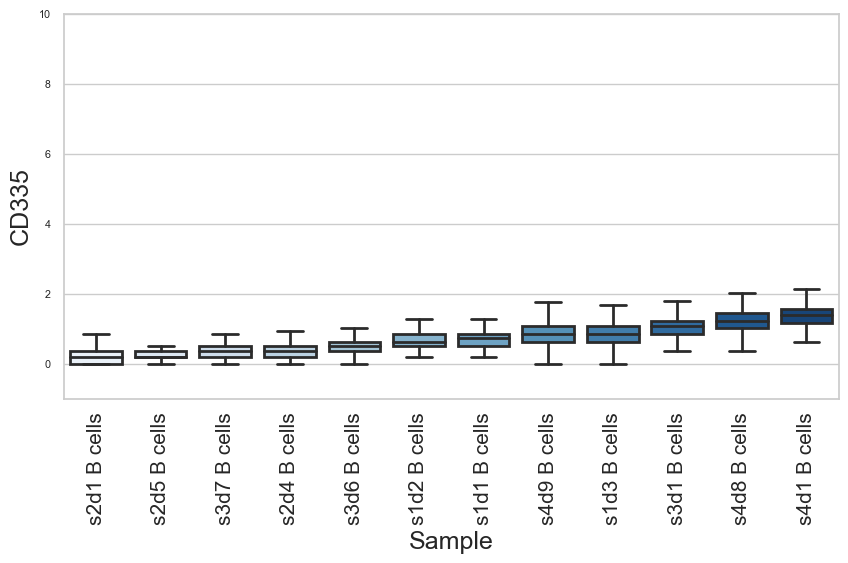

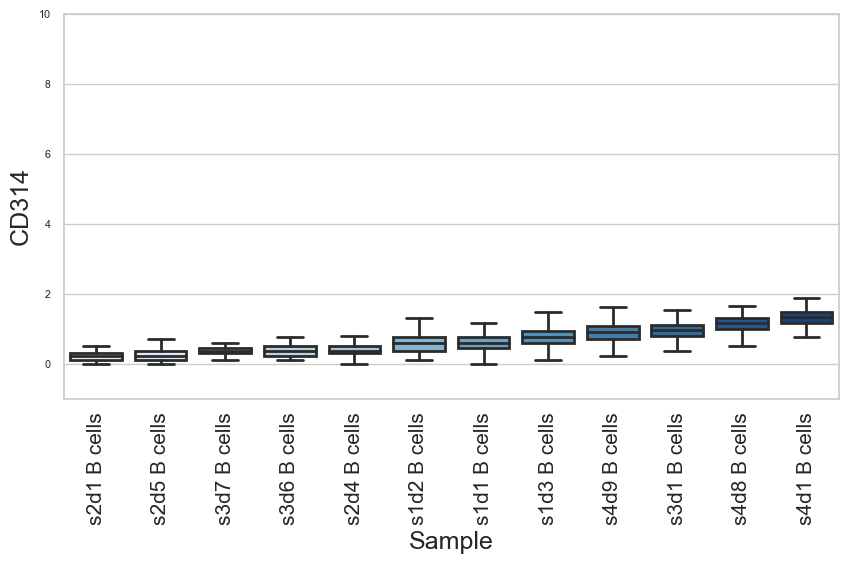

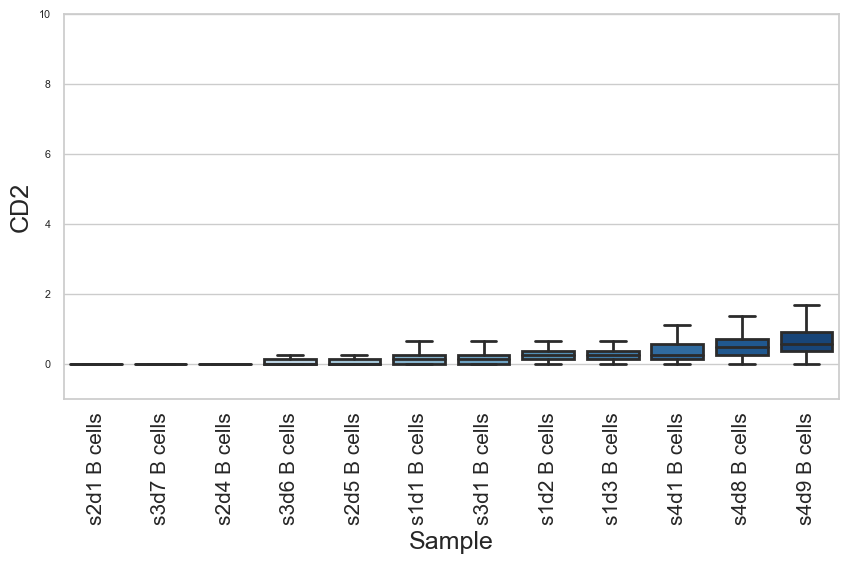

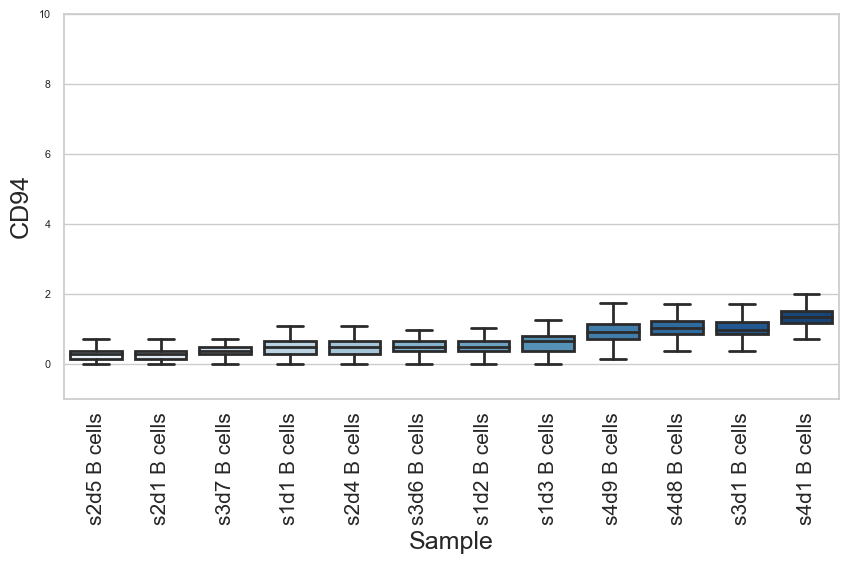

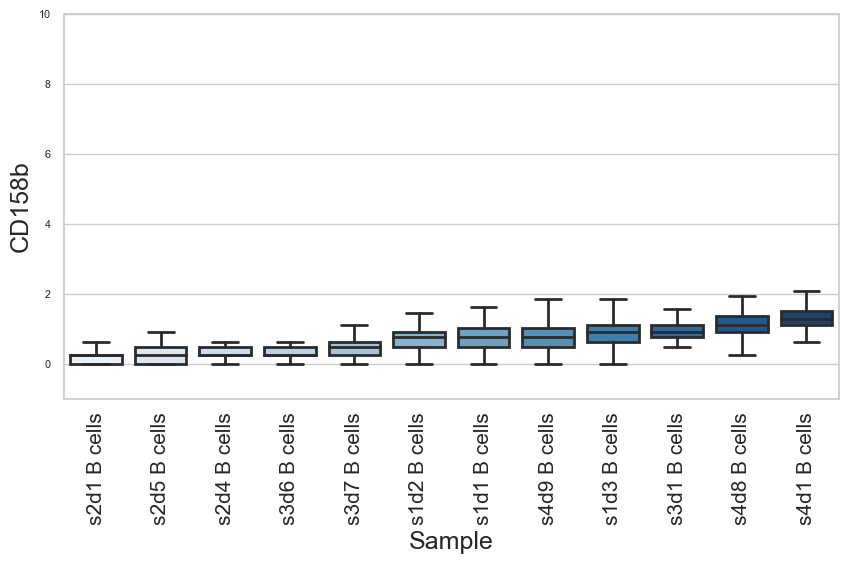

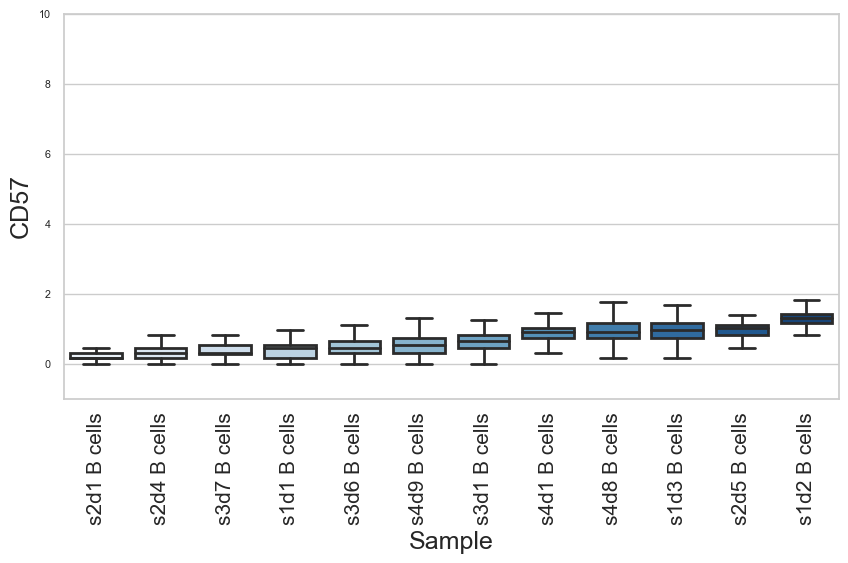

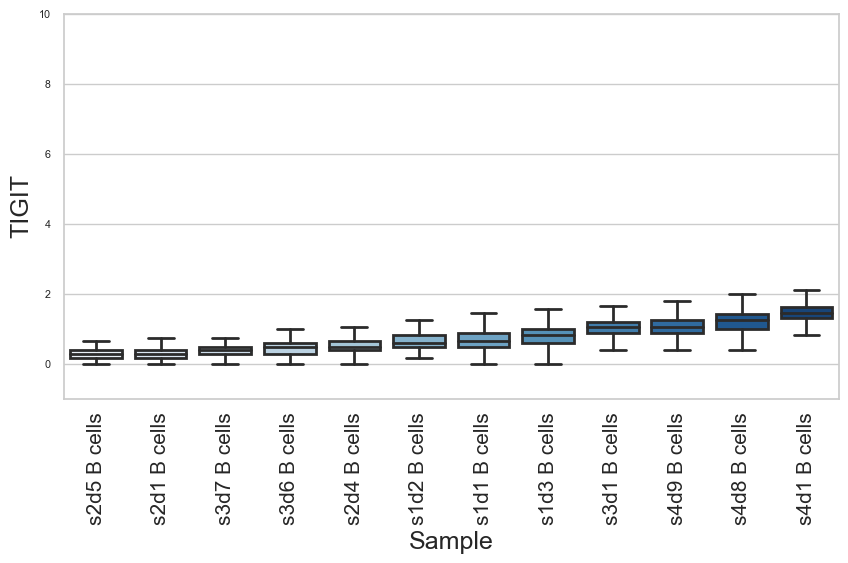

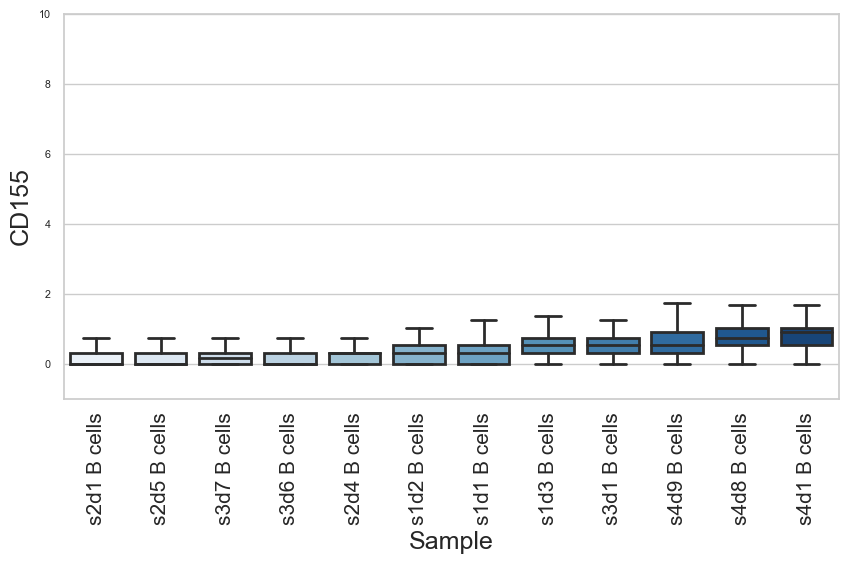

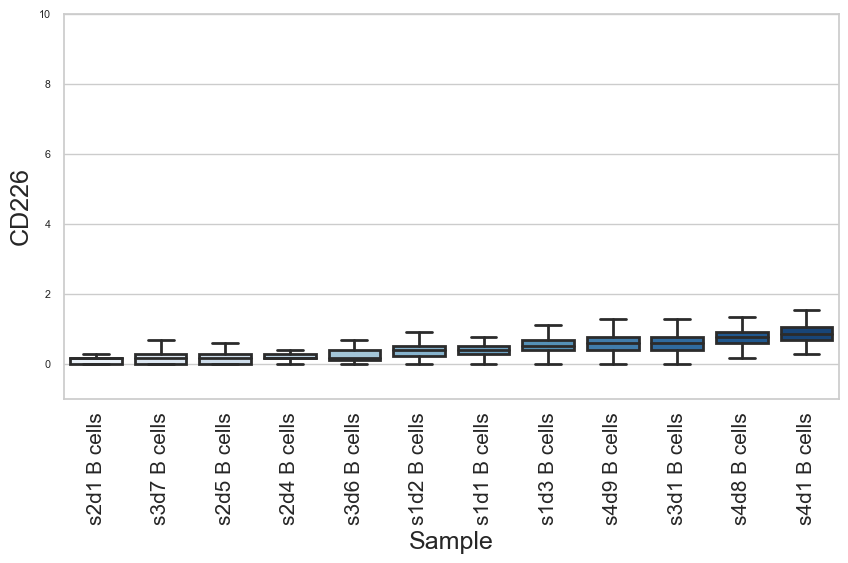

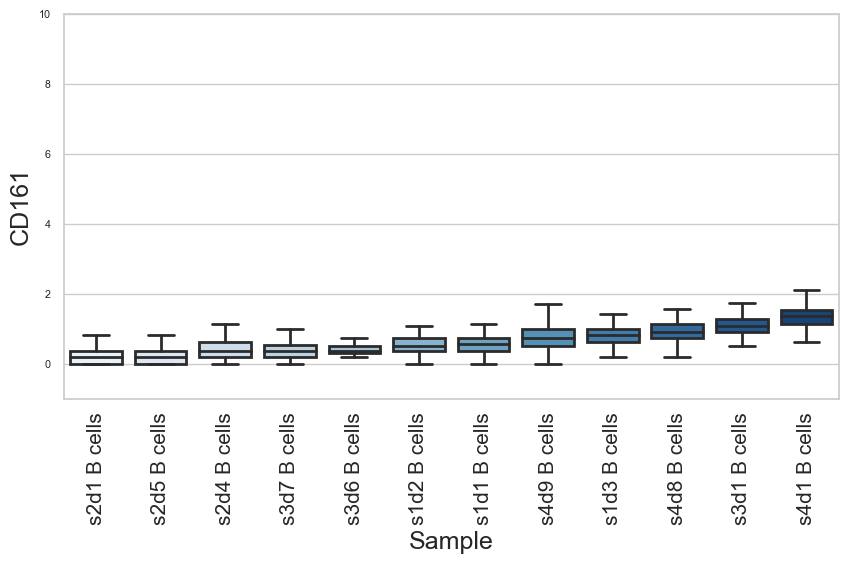

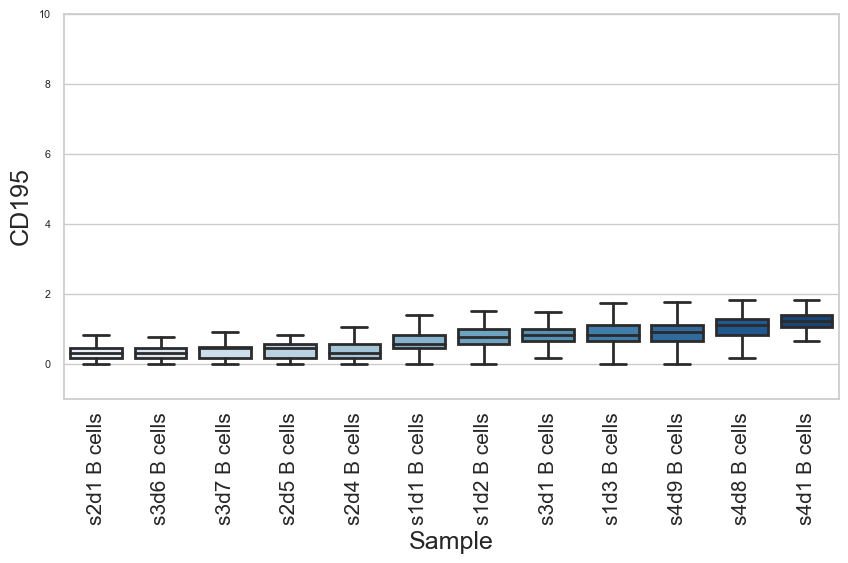

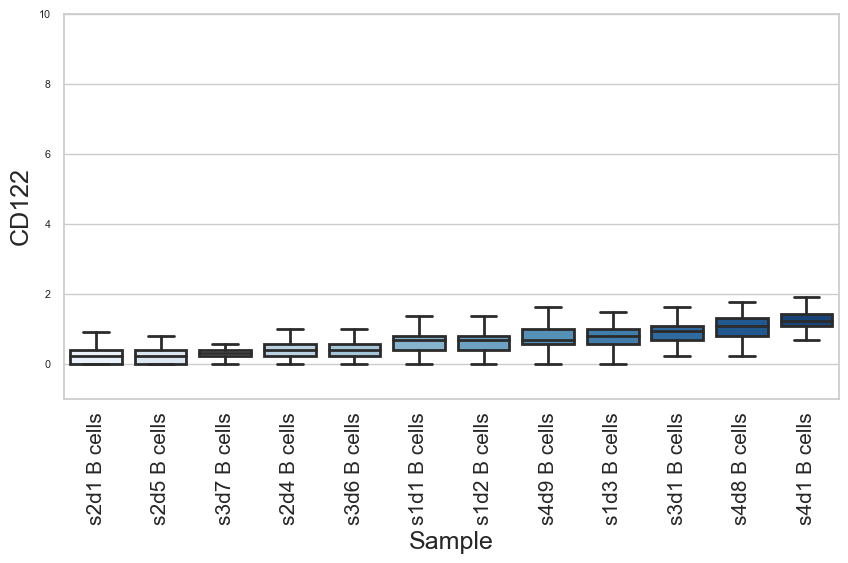

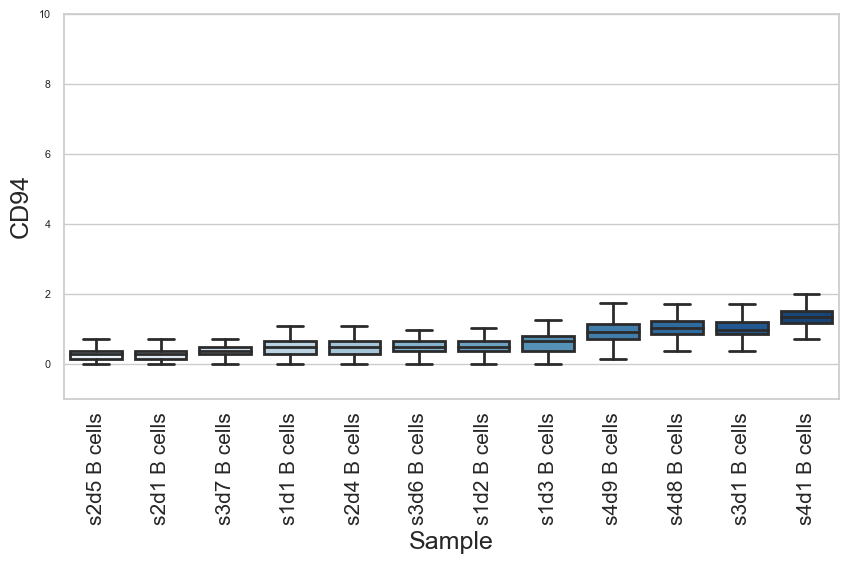

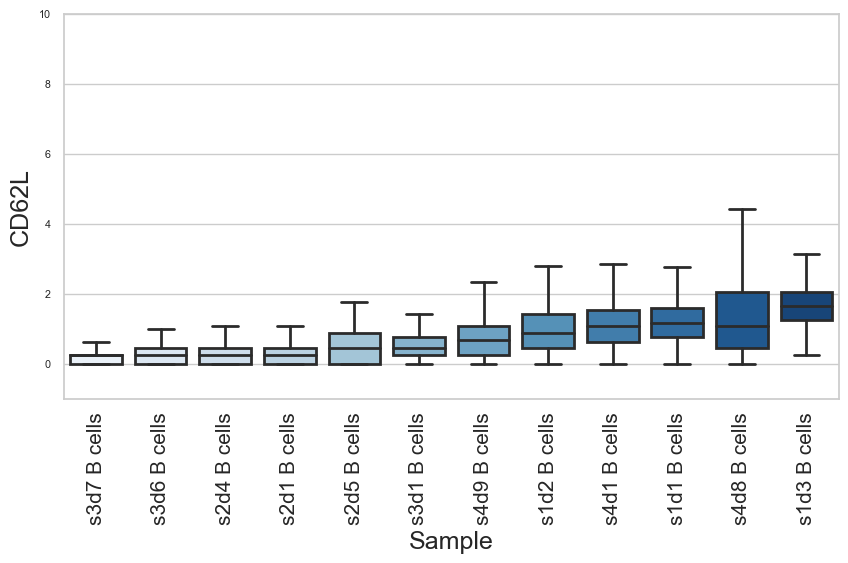

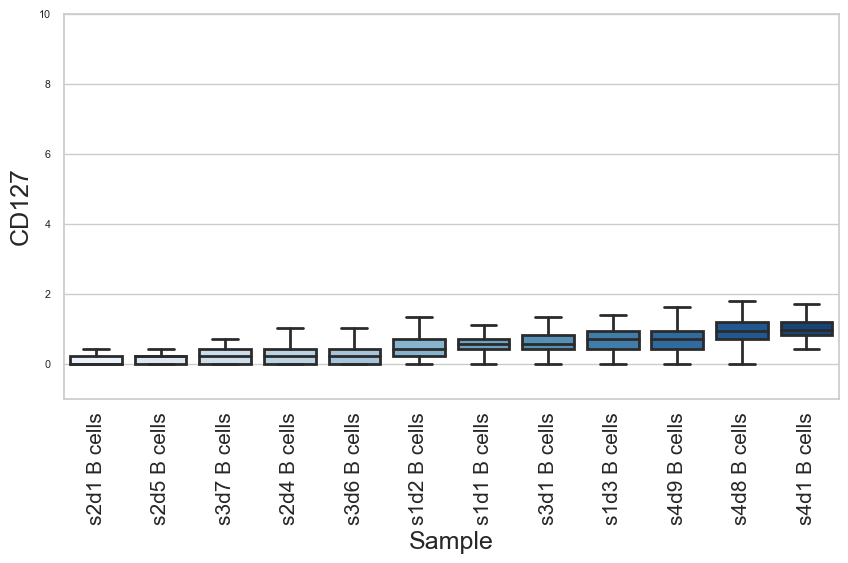

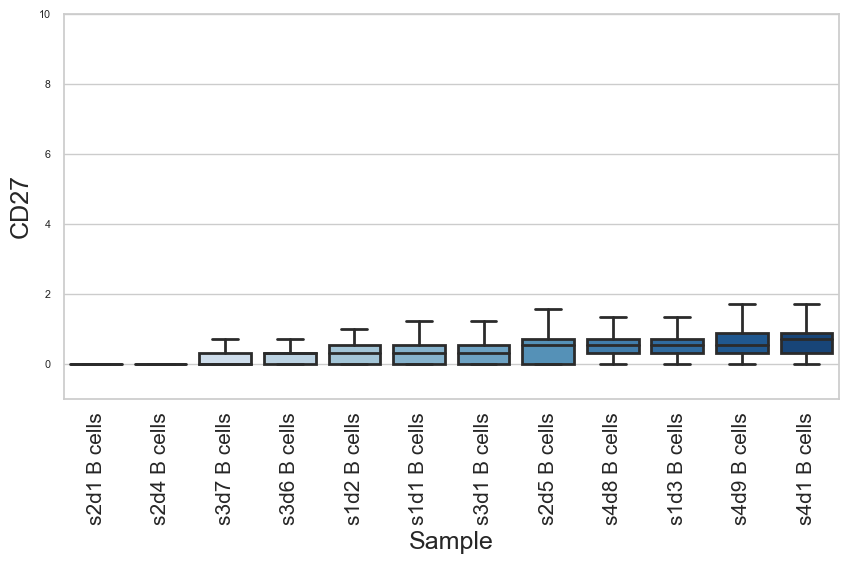

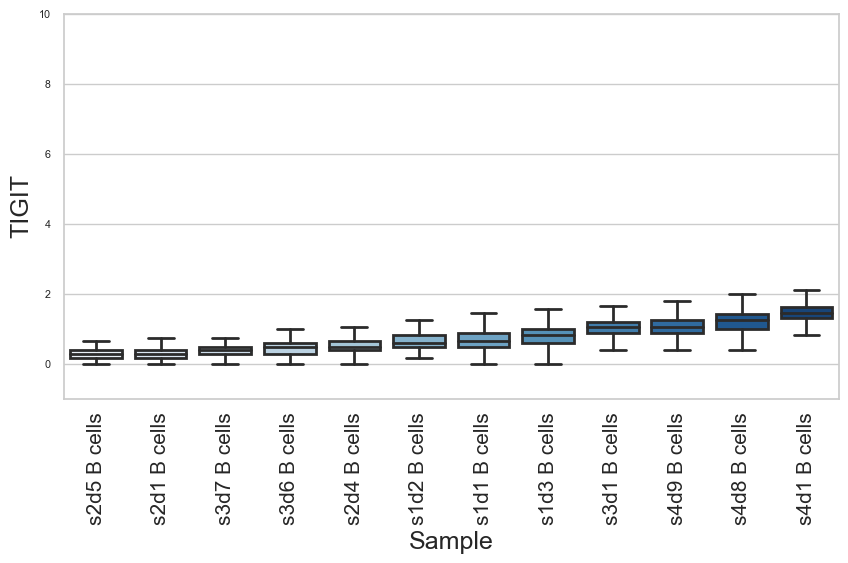

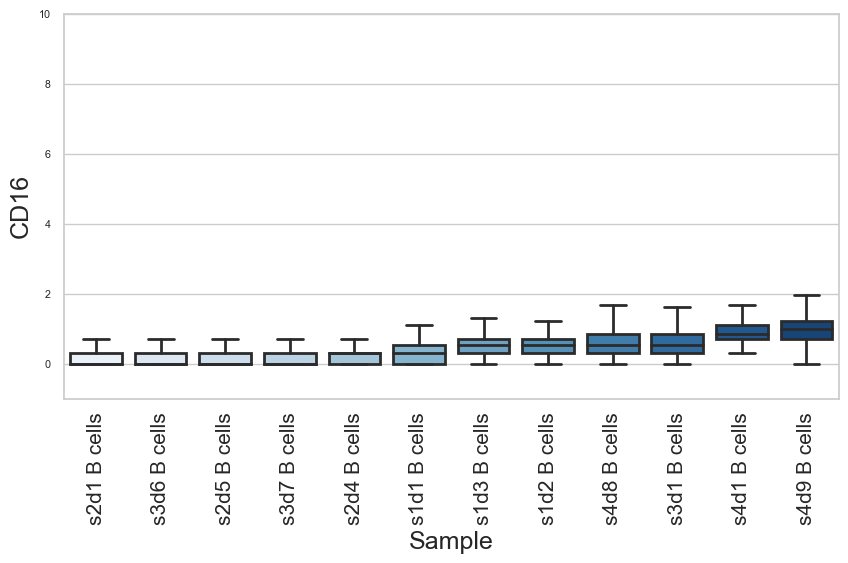

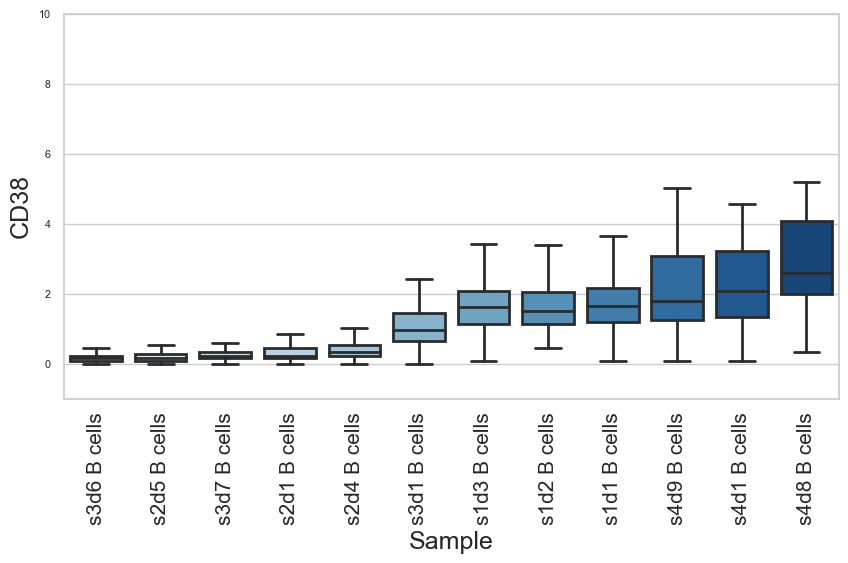

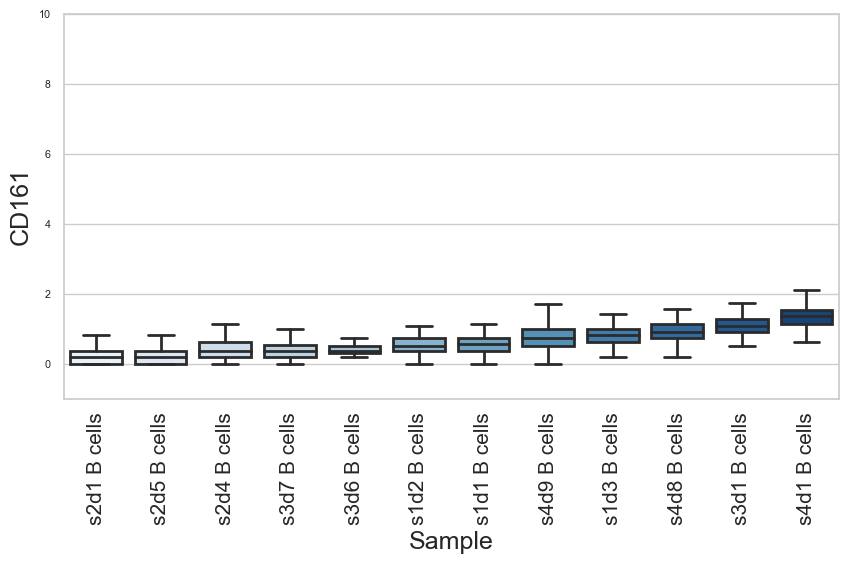

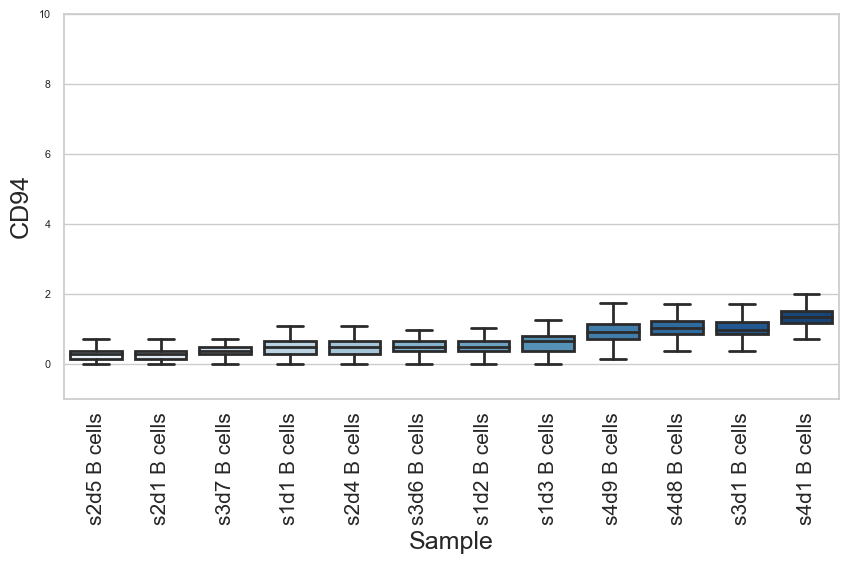

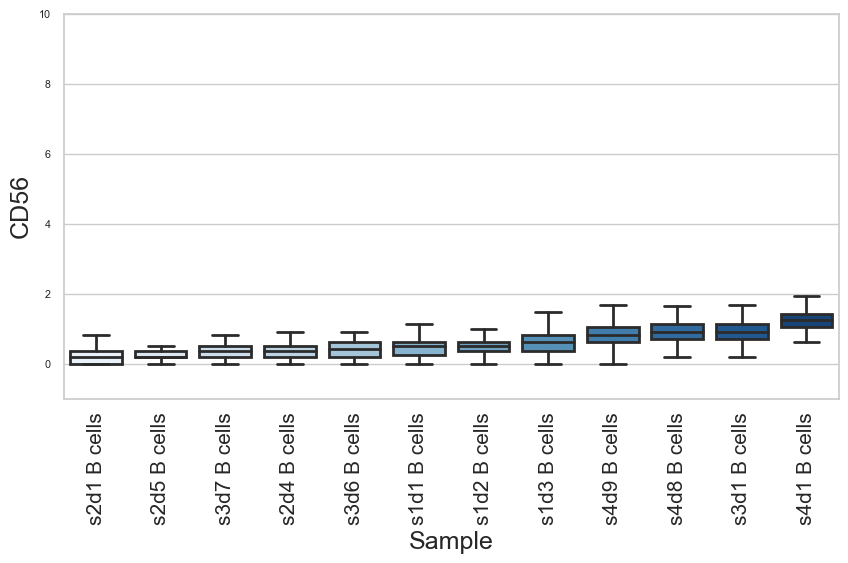

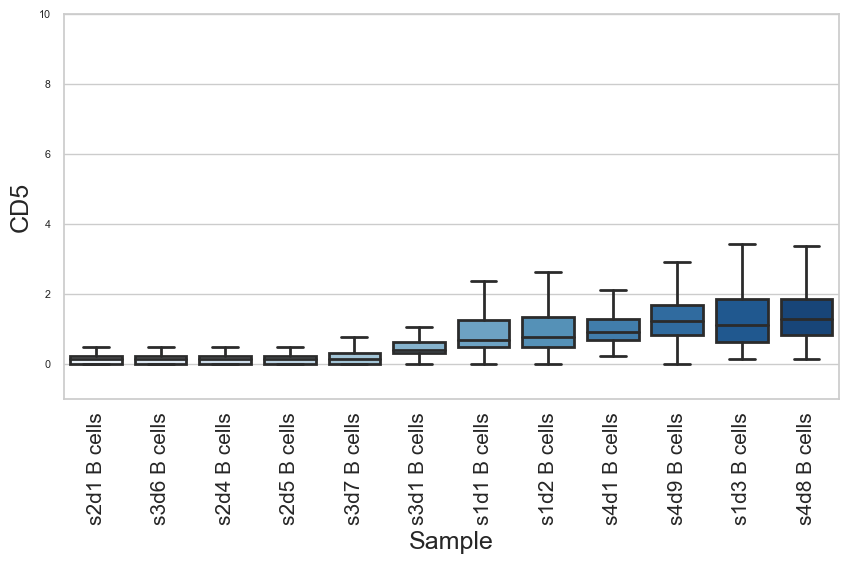

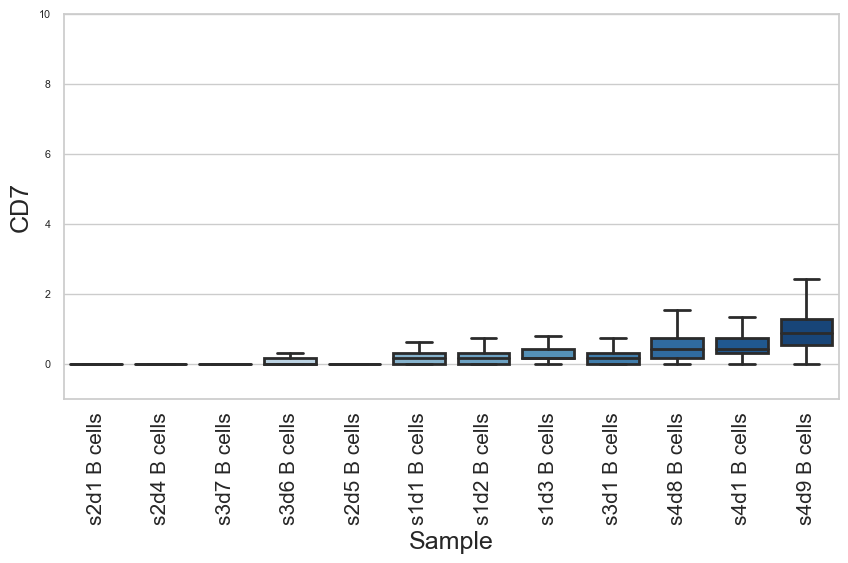

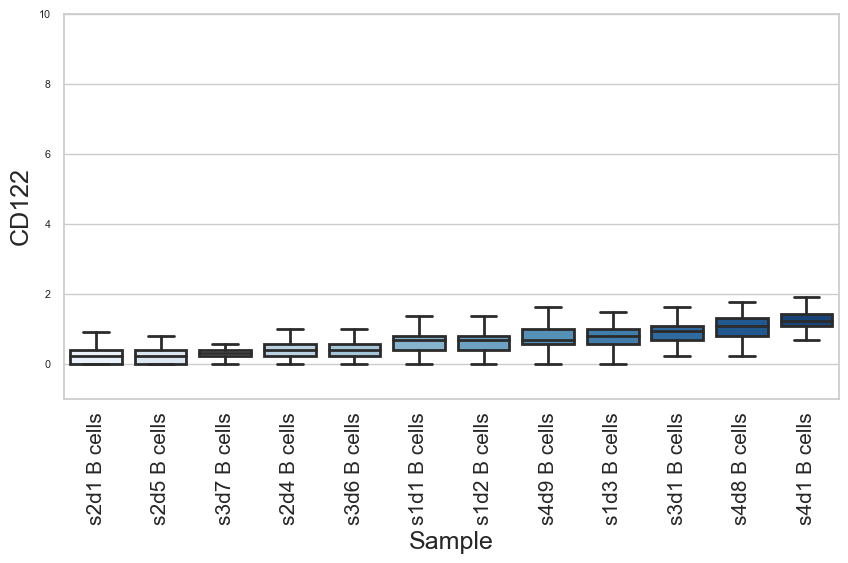

In [762]:
#protein counts in B cells

for marker in nk_all:
    plt.figure(figsize=[10,5])
    plt.ylim(-1, 10)
    by_counts = df_new_neurips.groupby(['Sample'])[marker].mean().sort_values(ascending=True)
    b=sns.boxplot(data=df_new_neurips,x="Sample", y=marker, order=by_counts.index, fliersize=0, palette="Blues", linewidth=2)
    b.set_xticklabels(b.get_xticklabels(),rotation=90) 
    b.tick_params(axis='x', labelsize=15)
    plt.xlabel('Sample', fontsize=18)
    plt.ylabel(marker, fontsize=18);

In [763]:
#NK cells

df_all.shape

(7388, 21)

In [764]:
#B cells

df_new_neurips.shape

(3835, 21)

In [765]:
df_new_neurips = df_new_neurips.T.drop_duplicates().T

In [766]:
df_all = df_all.T.drop_duplicates().T

In [767]:
df=pd.concat([df_all, df_new_neurips], axis=0)
df.shape

(11223, 21)

In [768]:
data1 = df[(df['Sample'] == "s4d1 NK cells") | (df['Sample'] == 's4d1 B cells')].assign(Samplepair= 1)   
data2 = df[(df['Sample'] == "s3d6 NK cells") | (df['Sample'] == 's3d6 B cells')].assign(Samplepair= 2)   
data3 = df[(df['Sample'] == "s1d2 NK cells") | (df['Sample'] == 's1d2 B cells')].assign(Samplepair= 3)   
data4 = df[(df['Sample'] == "s2d1 NK cells") | (df['Sample'] == 's2d1 B cells')].assign(Samplepair= 4)   
data5 = df[(df['Sample'] == "s3d7 NK cells") | (df['Sample'] == 's3d7 B cells')].assign(Samplepair= 5)   
data6 = df[(df['Sample'] == "s2d4 NK cells") | (df['Sample'] == 's2d4 B cells')].assign(Samplepair=6)   
data7 = df[(df['Sample'] == "s1d1 NK cells") | (df['Sample'] == 's1d1 B cells')].assign(Samplepair=7)   
data8 = df[(df['Sample'] == "s4d9 NK cells") | (df['Sample'] == 's4d9 B cells')].assign(Samplepair=8)   
data9 = df[(df['Sample'] == "s4d8 NK cells") | (df['Sample'] == 's4d8 B cells')].assign(Samplepair=9)   
data10 = df[(df['Sample'] == "s2d5 NK cells") | (df['Sample'] == 's2d5 B cells')].assign(Samplepair=10)
data11 = df[(df['Sample'] == "s3d1 NK cells") | (df['Sample'] == 's3d1 B cells')].assign(Samplepair=11)   
data12 = df[(df['Sample'] == "s1d3 NK cells") | (df['Sample'] == 's1d3 B cells')].assign(Samplepair=12) 

In [770]:
cdf = pd.concat([data1, data2, data3 ,data4, data5, data6, data7, data8, data9, data10, data11, data12])


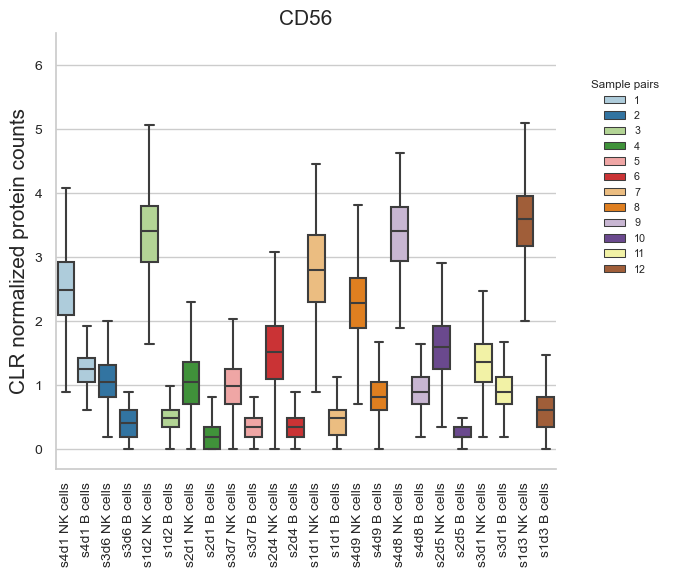

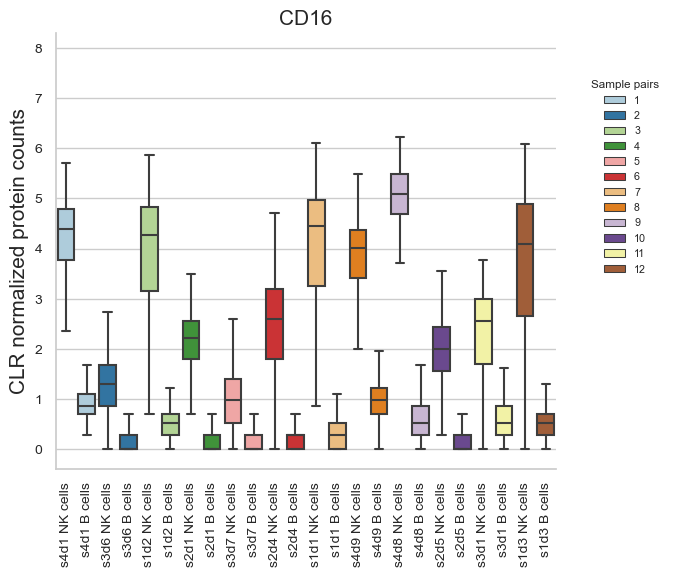

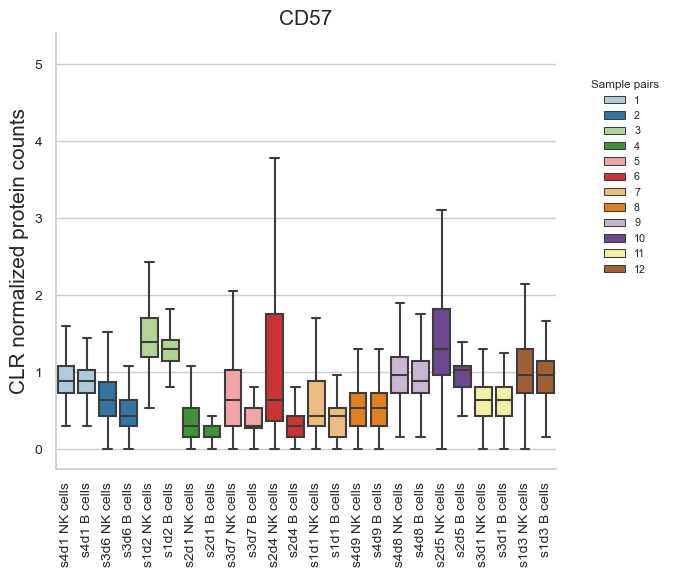

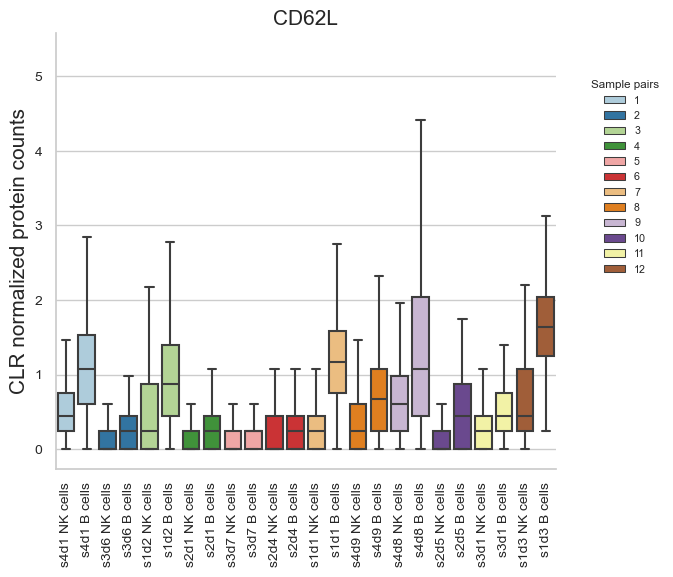

In [774]:
#CD56
sns.set_theme(style = "whitegrid", font_scale= 0.7)
ax = sns.catplot(x="Sample", y="CD56", hue="Samplepair",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf,
            legend = "CD56")
ax.set_xticklabels(rotation = 90)
ax.fig.set_size_inches(10, 5)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set(xlabel=None)
ax.set_ylabels('CLR normalized protein counts', fontsize= 15)
sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')
plt.title("CD56", fontsize=15)

plt.show()


#CD16

sns.set_theme(style = "whitegrid", font_scale= 0.7)
ax = sns.catplot(x="Sample", y="CD16", hue="Samplepair",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf,
            legend = "CD16")
ax.set_xticklabels(rotation = 90)
ax.fig.set_size_inches(10, 5)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set(xlabel=None)
ax.set_ylabels('CLR normalized protein counts', fontsize= 15)
sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')
plt.title("CD16", fontsize=15)

plt.show()

#CD57

sns.set_theme(style = "whitegrid", font_scale= 0.7)
ax = sns.catplot(x="Sample", y="CD57", hue="Samplepair",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf,
            legend = "CD16")
ax.set_xticklabels(rotation = 90)
ax.fig.set_size_inches(10, 5)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set(xlabel=None)
ax.set_ylabels('CLR normalized protein counts', fontsize= 15)
sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')
plt.title("CD57", fontsize=15)

plt.show()

#CD62L

sns.set_theme(style = "whitegrid", font_scale= 0.7)
ax = sns.catplot(x="Sample", y="CD62L", hue="Samplepair",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf,
            legend = "CD16")
ax.set_xticklabels(rotation = 90)
ax.fig.set_size_inches(10, 5)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set(xlabel=None)
ax.set_ylabels('CLR normalized protein counts', fontsize= 15)
sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')
plt.title("CD62L", fontsize=15)

plt.show()

### Granja

In [722]:
samples_g=adata_granja.obs['POOL'].unique().tolist()
samples_g

['GSM4138872', 'GSM4138873', 'GSM4138874', 'GSM4138880', 'GSM4138885']

In [723]:
listOfmarkers= nk_all

nk_granja= []

for x in listOfmarkers:
    if x in granja_nk_prot.columns:
        nk_granja.append(x)



In [724]:
samples_g

['GSM4138872', 'GSM4138873', 'GSM4138874', 'GSM4138880', 'GSM4138885']

In [725]:
nk_granja=['CD127', 'TIGIT', 'CD16', 'CD56']

In [726]:
nk_granja

['CD127', 'TIGIT', 'CD16', 'CD56']

In [727]:
#saving NK markers from all samples into a list

list_samples=[]

for sample in samples_g:
    eg=adata_granja[adata_granja.obs['new_cell_type'] == 'NK']
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_clr_granja']
    prot_marker=prot[nk_granja]
    list_samples.append(prot_marker)



In [728]:
string= " NK cells"

samples_g = [x + string for x in samples_g]

In [729]:

list_granja=[]

for i in range(len(list_samples)):
    sample= list_samples[i]
    sample["Sample"]=samples_g[i]
    list_granja.append(sample)

In [730]:
df_all_g=pd.concat(list_granja, axis=0)



In [731]:
df_all_g.shape

(1033, 5)

In [732]:
df_all = df_all.T.drop_duplicates().T

In [733]:
df_all_g

,CD127,TIGIT,CD16,CD56,Sample
BMMC_D1T1:AAAGAACTCGAAGAAT-1,3.336928,2.899355,1.817872,2.060390,GSM4138872 NK cells
BMMC_D1T1:AAAGGGCAGAAGTGTT-1,2.770059,3.537224,1.308926,1.409305,GSM4138872 NK cells
BMMC_D1T1:AAAGTCCGTCGGAAAC-1,1.369466,2.117450,6.548810,5.008568,GSM4138872 NK cells
BMMC_D1T1:AAAGTGAGTTACCCAA-1,4.543125,0.820348,1.690424,1.875397,GSM4138872 NK cells
BMMC_D1T1:AACAAAGAGTCTGCGC-1,1.163131,3.419610,1.930898,1.604798,GSM4138872 NK cells
...,...,...,...,...,...
BMMC_D1T2:TTTACTGGTCAGGAGT-1,0.841551,2.826789,1.308926,1.768252,GSM4138873 NK cells
BMMC_D1T2:TTTCACACAACGCATT-1,1.331465,2.495170,1.734736,1.729824,GSM4138873 NK cells
BMMC_D1T2:TTTCAGTTCCAACACA-1,1.926654,2.663649,5.962028,5.588103,GSM4138873 NK cells
BMMC_D1T2:TTTCAGTTCTCGGCTT-1,0.960609,1.067100,5.292056,2.451431,GSM4138873 NK cells


In [734]:
samples_g=adata_granja.obs['POOL'].unique().tolist()

In [735]:
adata_granja.obs["cell_type"].unique().tolist()

['CD4+ T 1',
 'CD14+ monocyte 1',
 'Pre B',
 'Pro B',
 'CD8+ T',
 'Promonocyte',
 'CD14+ monocyte 2',
 'Plasmacytoid dendritic cell',
 'NK T 2',
 'Immature B',
 'Late erythoid precursor 1',
 'Pre B (cycling)',
 'NK',
 'Late erythoid precursor 3',
 'Early erythoid precursor',
 'CD16+ monocyte',
 'Conventional dendritic cell',
 'HSC',
 'NK T 1',
 'Late erythoid precursor 2',
 'Plasma B cell',
 'Stromal cell',
 'Megakaryocyte',
 nan]

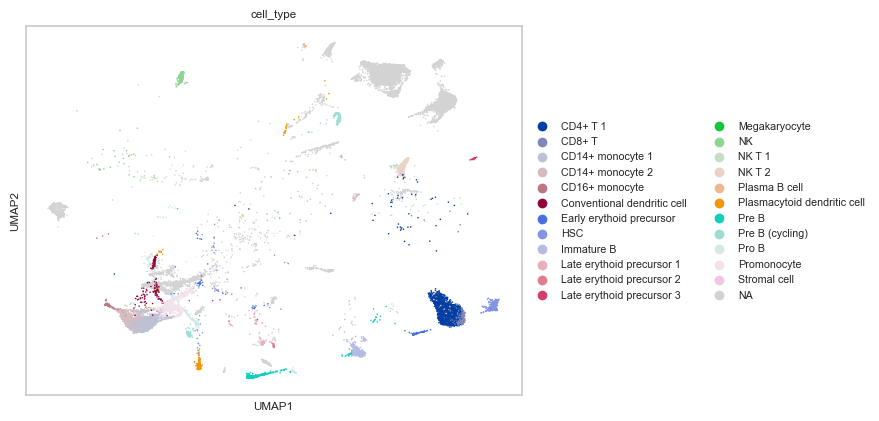

In [736]:
sc.pl.umap(adata_granja, color = ['cell_type'], color_map = 'viridis', ncols = 1)

In [737]:
#saving NK markers from all samples into a list, B cells

list_samples_b=[]

for sample in samples_g:
    eg=adata_granja[adata_granja.obs['new_cell_type'] == 'B']
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_clr_granja']
    prot_marker=prot[nk_granja]
    list_samples_b.append(prot_marker)




In [738]:
samples_g=adata_granja.obs['POOL'].unique().tolist()

In [739]:
string= " B cells"

samples_b = [x + string for x in samples_g]


In [740]:
samples_b

['GSM4138872 B cells',
 'GSM4138873 B cells',
 'GSM4138874 B cells',
 'GSM4138880 B cells',
 'GSM4138885 B cells']

In [741]:
list_granja_b=[]

for i in range(len(list_samples_b)):
    sample= list_samples_b[i]
    sample["Sample"]=samples_b[i]
    list_granja_b.append(sample)

In [742]:
df_all_g_b=pd.concat(list_granja_b, axis=0)



In [743]:
df=pd.concat([df_all_g, df_all_g_b], axis=0)

In [744]:
samples_g


['GSM4138872', 'GSM4138873', 'GSM4138874', 'GSM4138880', 'GSM4138885']

In [745]:
data1 = df[(df['Sample'] == "GSM4138872 NK cells") | (df['Sample'] == 'GSM4138872 B cells')].assign(Samplepair= 1)   
data2 = df[(df['Sample'] == "GSM4138873 NK cells") | (df['Sample'] == 'GSM4138873 B cells')].assign(Samplepair= 2)   


In [746]:
cdf = pd.concat([data1, data2])

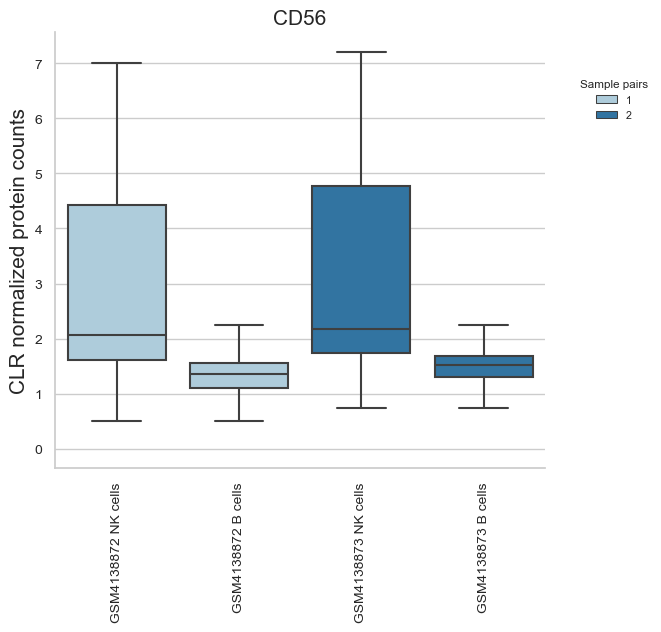

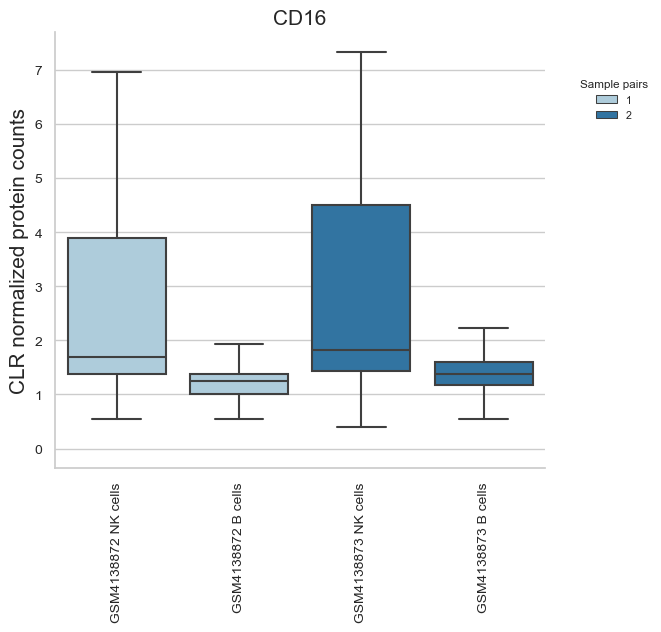

In [747]:
#CD56

sns.set_theme(style = "whitegrid", font_scale= 0.7)
ax = sns.catplot(x="Sample", y="CD56", hue="Samplepair",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf,
            legend = "CD56")
ax.set_xticklabels(rotation = 90)
ax.fig.set_size_inches(10, 5)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set(xlabel=None)
ax.set_ylabels('CLR normalized protein counts', fontsize= 15)
plt.title("CD56", fontsize=15)
sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')


plt.show()

#CD16

sns.set_theme(style = "whitegrid", font_scale= 0.7)
ax = sns.catplot(x="Sample", y="CD16", hue="Samplepair",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf,
            legend = "CD16")
ax.set_xticklabels(rotation = 90)
ax.fig.set_size_inches(10, 5)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set(xlabel=None)
ax.set_ylabels('CLR normalized protein counts', fontsize= 15)
plt.title("CD16", fontsize=15)
sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')


plt.show()

### Easigenomics

In [559]:
samples_e=adata_easi.obs['POOL'].unique().tolist()

In [ ]:
# only NK cells?

### Seurat

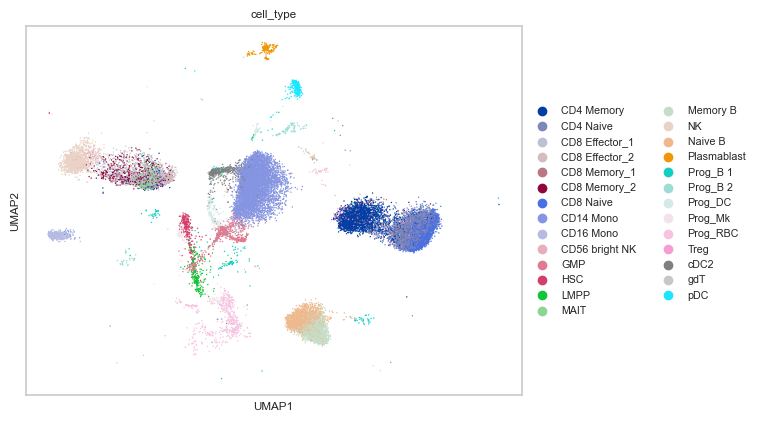

In [775]:
sc.pl.umap(adata_seurat, color = ['cell_type'], color_map = 'viridis', ncols = 1)

In [776]:
adata_seurat.obs["cell_type"].unique().tolist()

['Prog_RBC',
 'gdT',
 'CD4 Naive',
 'CD4 Memory',
 'CD14 Mono',
 'Naive B',
 'CD8 Naive',
 'Treg',
 'CD8 Effector_2',
 'NK',
 'GMP',
 'CD8 Effector_1',
 'CD16 Mono',
 'pDC',
 'CD8 Memory_1',
 'MAIT',
 'Memory B',
 'cDC2',
 'CD56 bright NK',
 'Prog_B 2',
 'Prog_Mk',
 'CD8 Memory_2',
 'Plasmablast',
 'HSC',
 'LMPP',
 'Prog_DC',
 'Prog_B 1']

In [777]:
samples_s=adata_seurat.obs['POOL'].unique().tolist()
samples_s

['Seurat']

In [778]:
listOfmarkers= nk_all

nk_seurat= []

for x in listOfmarkers:
    if x in seurat_nk_prot.columns:
        nk_seurat.append(x)

In [779]:
nk_seurat

['CD57', 'CD161', 'CD127', 'CD27', 'CD16', 'CD38', 'CD161', 'CD56']

In [780]:
#saving NK markers from all samples into a list

list_samples_s=[]

for sample in samples_s:
    eg=adata_seurat[adata_seurat.obs['new_cell_type'] == 'NK']
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_clr_seurat']
    prot_marker=prot[nk_seurat]
    list_samples_s.append(prot_marker)

In [781]:

string= " NK cells"

samples_s = [x + string for x in samples_s]

In [782]:

list_seurat=[]

for i in range(len(list_samples_s)):
    sample= list_samples_s[i]
    sample["Sample"]=samples_s[i]
    list_seurat.append(sample)


In [783]:
df_all_s=pd.concat(list_seurat, axis=0)

In [784]:
df_all_s = df_all_s.T.drop_duplicates().T

In [785]:
samples_s=adata_seurat.obs['POOL'].unique().tolist()

In [786]:

#saving NK markers from all samples into a list, B cells

list_samples_s_b=[]

for sample in samples_s:
    eg=adata_seurat[adata_seurat.obs['new_cell_type'] == 'Naive B']
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_clr_seurat']
    prot_marker=prot[nk_seurat]
    list_samples_s_b.append(prot_marker)

In [787]:
string= " B cells"

samples_s = [x + string for x in samples_s]

In [788]:
list_seurat_b=[]

for i in range(len(list_samples_s_b)):
    sample= list_samples_b[i]
    sample["Sample"]=samples_s[i]
    list_seurat_b.append(sample)

In [789]:
df_all_s_b=pd.concat(list_seurat_b, axis=0)


In [790]:
df=pd.concat([df_all_s, df_all_s_b], axis=0)

In [791]:
data1 = df[(df['Sample'] == "Seurat NK cells") | (df['Sample'] == 'Seurat B cells')].assign(Samplepair= 1)   


In [792]:
cdf = data1

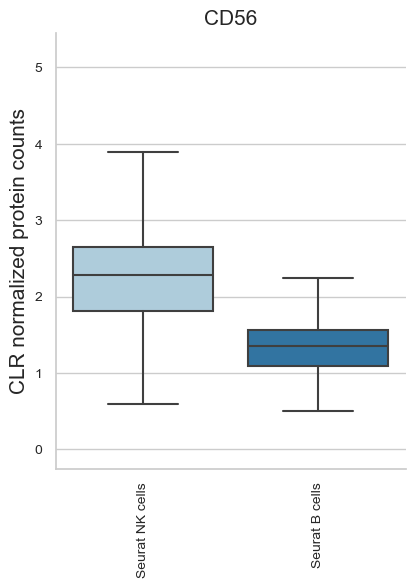

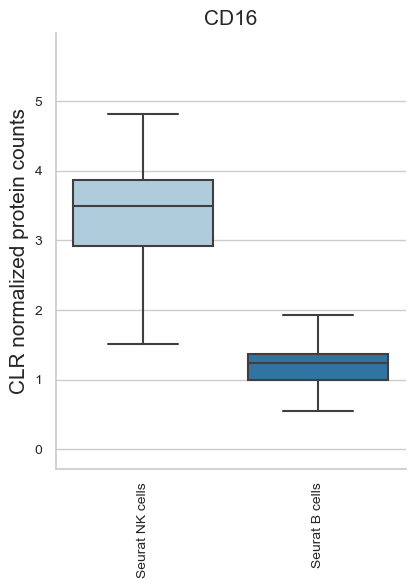

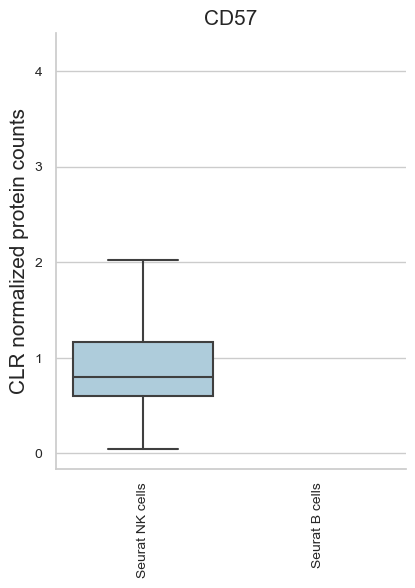

In [795]:
#CD56
sns.set_theme(style = "whitegrid", font_scale= 0.7)
ax = sns.catplot(x="Sample", y="CD56",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf,
            legend = "CD56")
ax.set_xticklabels(rotation = 90)
ax.fig.set_size_inches(5, 5)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.title("CD56", fontsize=15)
ax.set(xlabel=None)
ax.set_ylabels('CLR normalized protein counts', fontsize= 15)
plt.show()

#CD16
sns.set_theme(style = "whitegrid", font_scale= 0.7)
ax = sns.catplot(x="Sample", y="CD16",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf,
            legend = "CD56")
ax.set_xticklabels(rotation = 90)
ax.fig.set_size_inches(5, 5)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.title("CD16", fontsize=15)
ax.set(xlabel=None)
ax.set_ylabels('CLR normalized protein counts', fontsize= 15)
plt.show()

#CD57
sns.set_theme(style = "whitegrid", font_scale= 0.7)
ax = sns.catplot(x="Sample", y="CD57",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=cdf,
            legend = "CD57")
ax.set_xticklabels(rotation = 90)
ax.fig.set_size_inches(5, 5)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.title("CD57", fontsize=15)
ax.set(xlabel=None)
ax.set_ylabels('CLR normalized protein counts', fontsize= 15)
plt.show()